# Unit Tests
This script contains validation test for each of the python modules, including:
- Environment
- Robot
- Sensor
    - ground sensor
    - IR sensors
    - comm sensors
- Controller
    - ANN
- Actuator
    - comm output
    - wheel velocity
- Update location
    - wall collision
    - agent overlap
- Selection
    - 
- Visualization
    - 

trial:
- initialize environment
    - targets
    
- initialize agents (4 agents)
    - sensor, actuators
    - networks

for i in timesteps:  

        for a in agents:
                1. agent location and orientation - sensor readings
                2. sensor readings - network input
                3. network input - network output
                4. network output - actuator input
                5. actuator input - agent movement
                6. update agent location and orientation
                7. store all information for the current trials

animate trial:
- target
- position and location of the agent at every timestep

In [19]:
from Environment import environment
from Agent import agent
from Controller import MN_controller

import random as rd
import math
from matplotlib import pyplot as plt
from matplotlib.patches import Circle, FancyArrow
from Helper import *

# Environment

[[(80, 80), 35], [(190, 190), 35]]

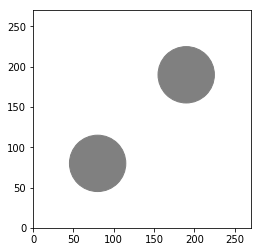

In [11]:
env = environment()
env.show()
env.targets

# Agents


            position: (63.66793602484467, 3.0501216690466904),
            angle: 65.4006589023673
            


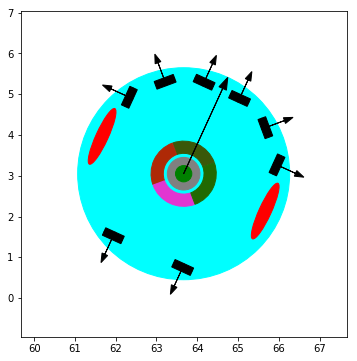

In [12]:
from Agent import agent

ang = rd.uniform(0, 360)
x = rd.uniform(0, 100)
y = rd.uniform(0, 100)

robot = agent((x, y), ang, name='robot')
robot.show(verbose=True)

# Ground Sensor

(13.32509407337133, 225.88598032694753)
robot1
pre: 0
post: 0 

(108.55053462014439, 69.07044485969067)
robot2
pre: 0
post: 1 

(59.800828052217206, 178.67796849456028)
robot3
pre: 0
post: 0 

(238.38979729625285, 130.32647696127978)
robot4
pre: 0
post: 0 



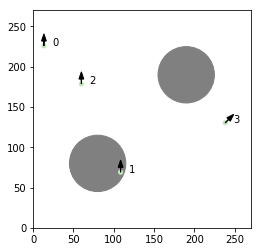

In [8]:
rob1 = agent((rd.uniform(5, 265), rd.uniform(5, 265)), 90, name='robot1')
rob2 = agent((rd.uniform(5, 265), rd.uniform(5, 265)), 90, name='robot2')
rob3 = agent((rd.uniform(5, 265), rd.uniform(5, 265)), 90, name='robot3')
rob4 = agent((rd.uniform(5, 265), rd.uniform(5, 265)), 45, name='robot4')

env.agents=[rob1, rob2, rob3, rob4]
env.show()

for a in env.agents:
    print(a.loc)
    print(a.name)
    print('pre:', a.ground_reading)
    a.get_ground_reading(env)
    print('post:', a.ground_reading, '\n')

# IR Sensors

robot1
ir readings, pre: [0, 0, 0, 0, 0, 0, 0, 0]
ir readings, post: [0.3198435483169847, 0, 0, 0, 0.6975497207051635, 0.6152291536303246, 0.3846039172768714, 0.7588016289066075]

==============NEXT ROBOT================

robot2
ir readings, pre: [0, 0, 0, 0, 0, 0, 0, 0]
ir readings, post: [0.7175055798375369, 0, 0, 0, 0, 0, 0.7054051247446376, 0.7054051247446376]

==============NEXT ROBOT================

robot3
ir readings, pre: [0, 0, 0, 0, 0, 0, 0, 0]
ir readings, post: [0.7983716857408418, 0.5338486453314001, 0.7610771455677097, 0.7610771455677111, 0.3729046905893013, 0.4907755160851106, 0.6202309105155964, 0.6202309105155964]

==============NEXT ROBOT================

robot4
ir readings, pre: [0, 0, 0, 0, 0, 0, 0, 0]
ir readings, post: [0.7175055798375369, 0.1311987961110871, 0.7610771455677097, 0.7610771455677111, 0, 0, 0.8202309105155965, 0.8202309105155965]

==============NEXT ROBOT================



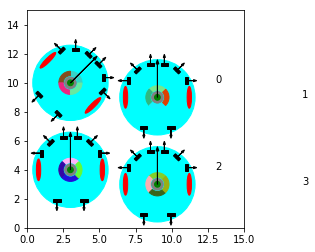

In [9]:
rob1 = agent((3, 10), 45, name='robot1')
rob2 = agent((9, 9), 90, name='robot2')
rob3 = agent((3, 4), 90, name='robot3')
rob4 = agent((9, 3), 90, name='robot4')

env.agents=[rob1, rob2, rob3, rob4]
env.show(15, 15, verbose=True)

for a in env.agents:
    print(a.name)
    print('ir readings, pre:', a.ir_readings)
    a.get_ir_readings(env)
    print('ir readings, post:', a.ir_readings)
    print('\n==============NEXT ROBOT================\n')

# Comm Sensors

robot1 0.23960037582781413
robot2 0.13114810951267708
robot3 0.883847261066388
robot4 0.5684184245375489
robot1
comm readings, pre: [0, 0, 0, 0]
current agent: robot2
perceived signal: 0.13114810951267708
received by right sensor
current agent: robot3
perceived signal: 0.883847261066388
received by right sensor
current agent: robot4
perceived signal: 0.5684184245375489
received by right sensor
comm readings, post: [0, 0, 0, 0.883847261066388]

==============NEXT ROBOT================

robot2
comm readings, pre: [0, 0, 0, 0]
current agent: robot1
perceived signal: 0.23960037582781413
received by front sensor
current agent: robot3
perceived signal: 0.883847261066388
received by left sensor
current agent: robot4
perceived signal: 0.5684184245375489
received by rear sensor
comm readings, post: [0.23960037582781413, 0.883847261066388, 0.5684184245375489, 0]

==============NEXT ROBOT================

robot3
comm readings, pre: [0, 0, 0, 0]
current agent: robot1
perceived signal: 0.2396003758

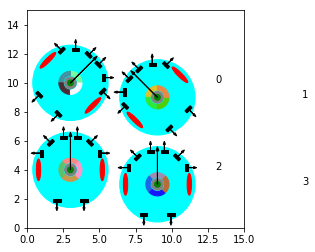

In [10]:
rob1 = agent((3, 10), 45, name='robot1')
rob2 = agent((9, 9), 135, name='robot2')
rob3 = agent((3, 4), 90, name='robot3')
rob4 = agent((9, 3), 90, name='robot4')

env.agents=[rob1, rob2, rob3, rob4]
env.show(15, 15, verbose=True)

for a in env.agents:
    a.comm_output = rd.uniform(0, 1)
    print(a.name, a.comm_output)
    
for a in env.agents:
    print(a.name)
    print('comm readings, pre:', a.comm_readings)
    a.get_comm_readings(env, verbose=True)
    print('comm readings, post:', a.comm_readings)
    print('\n==============NEXT ROBOT================\n')

# Controller in Agent

In [1]:
from Agent import agent
from Controller import MN_controller
from Helper import normalize
rt = agent(test_mode=True)
ann = MN_controller(random=True)

[-3.1176470588235294, 4.84313725490196, -4.647058823529412, 2.7254901960784315, 0.13725490196078383, -4.8431372549019605, 0.45098039215686203, 0.41176470588235237, 3.4705882352941178, -0.6862745098039209, 5.0, 2.3725490196078436, -4.8431372549019605, -0.019607843137254832, -3.156862745098039, -3.7058823529411766, -4.0588235294117645, -0.17647058823529438, 4.411764705882353, 1.6274509803921564, 3.313725490196079, 3.862745098039216, -3.3529411764705883, 0.0588235294117645, -0.0588235294117645, 2.215686274509804, -1.0784313725490198, 1.8235294117647065, 4.882352941176471, 1.1568627450980395, 1.9019607843137258, 0.2941176470588234, 2.4901960784313726, 3.0784313725490193, 4.882352941176471, -4.294117647058823, 0.9607843137254903, 2.1372549019607847, 4.372549019607844, -1.7058823529411766, 0.33333333333333304, -0.6470588235294112, -0.5294117647058822, -3.4705882352941178, -1.6274509803921564, -2.9607843137254903, -3.313725490196078, 4.607843137254902, -3.627450980392157, 4.607843137254902, -

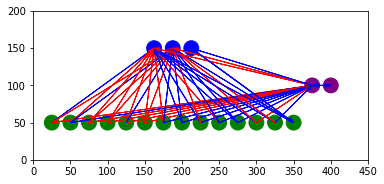

In [4]:
# Soooo this is a bug that I never figured out
# Basically, for a randomly generated network through agent, the genome and connections weights do not correspond
# But this is not a problem with the network on its own?


# Jk this is solved by deepcopying a network rather than just the network itself
print([normalize(g) for g in rt.ann.genome])
print(len(rt.ann.genome))
for k, v in rt.ann.nodes.items():
    print(k, v)
for k, v in rt.ann.connections.items():
    print(k, v)
rt.ann.show()

[4.490196078431373, -3.8235294117647056, 0.4901960784313726, -2.098039215686274, 4.411764705882353, 2.098039215686275, -0.4509803921568629, -0.5686274509803919, -4.450980392156863, -2.019607843137255, -2.8431372549019605, 1.1960784313725492, -1.7450980392156863, 0.21568627450980404, 3.431372549019608, 3.4705882352941178, 1.4705882352941178, -4.254901960784314, 4.490196078431373, 3.627450980392158, -4.215686274509804, 4.019607843137255, 1.6274509803921564, -1.9019607843137254, -1.7450980392156863, 0.7254901960784306, 0.33333333333333304, -2.294117647058824, -1.5882352941176467, -2.450980392156863, -3.784313725490196, -4.137254901960784, 1.666666666666666, 0.3725490196078427, 2.019607843137255, 1.5882352941176467, 2.88235294117647, 1.666666666666666, 0.33333333333333304, 0.8431372549019613, 1.7058823529411757, -1.784313725490196, 1.5882352941176467, 2.9607843137254894, -2.9607843137254903, 1.9411764705882355, -4.882352941176471, 3.7058823529411775, 0.2549019607843137, -2.9215686274509802

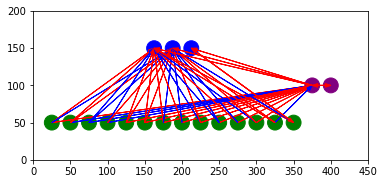

In [5]:
print([normalize(g) for g in ann.genome])
print(len(ann.genome))
for k, v in ann.connections.items():
    print(k, v)
ann.show()

[4.490196078431373, -3.8235294117647056, 0.4901960784313726, -2.098039215686274, 4.411764705882353, 2.098039215686275, -0.4509803921568629, -0.5686274509803919, -4.450980392156863, -2.019607843137255, -2.8431372549019605, 1.1960784313725492, -1.7450980392156863, 0.21568627450980404, 3.431372549019608, 3.4705882352941178, 1.4705882352941178, -4.254901960784314, 4.490196078431373, 3.627450980392158, -4.215686274509804, 4.019607843137255, 1.6274509803921564, -1.9019607843137254, -1.7450980392156863, 0.7254901960784306, 0.33333333333333304, -2.294117647058824, -1.5882352941176467, -2.450980392156863, -3.784313725490196, -4.137254901960784, 1.666666666666666, 0.3725490196078427, 2.019607843137255, 1.5882352941176467, 2.88235294117647, 1.666666666666666, 0.33333333333333304, 0.8431372549019613, 1.7058823529411757, -1.784313725490196, 1.5882352941176467, 2.9607843137254894, -2.9607843137254903, 1.9411764705882355, -4.882352941176471, 3.7058823529411775, 0.2549019607843137, -2.9215686274509802

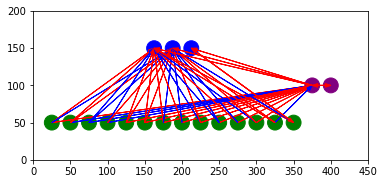

In [6]:
robot = agent()
robot.ann = ann
print([normalize(g) for g in robot.ann.genome])
print(len(robot.ann.genome))
for k, v in robot.ann.connections.items():
    print(k, v)
robot.ann.show()

# Controller

In [7]:
from Controller import MN_controller
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from Helper import normalize

In [8]:
genome = rd.choices(range(1, 255), k=69)
print(genome)
norm_genome = [normalize(g) for g in genome]
print(norm_genome)

[189, 119, 8, 243, 239, 87, 247, 14, 52, 188, 49, 249, 96, 169, 21, 152, 252, 172, 78, 15, 65, 195, 71, 153, 226, 49, 13, 115, 123, 94, 53, 133, 205, 211, 119, 70, 207, 117, 151, 63, 4, 71, 245, 235, 193, 143, 181, 23, 77, 224, 195, 137, 110, 206, 185, 111, 144, 227, 14, 155, 40, 125, 58, 34, 57, 169, 100, 202, 79]
[2.4117647058823533, -0.33333333333333304, -4.686274509803922, 4.529411764705882, 4.372549019607844, -1.5882352941176467, 4.686274509803921, -4.450980392156863, -2.9607843137254903, 2.3725490196078436, -3.0784313725490193, 4.76470588235294, -1.2352941176470589, 1.6274509803921564, -4.176470588235294, 0.9607843137254903, 4.882352941176471, 1.7450980392156872, -1.941176470588235, -4.411764705882353, -2.450980392156863, 2.6470588235294112, -2.215686274509804, 1.0, 3.862745098039216, -3.0784313725490193, -4.490196078431373, -0.4901960784313726, -0.17647058823529438, -1.3137254901960782, -2.9215686274509802, 0.21568627450980404, 3.0392156862745097, 3.2745098039215677, -0.33333333

(0.0, 20.0)

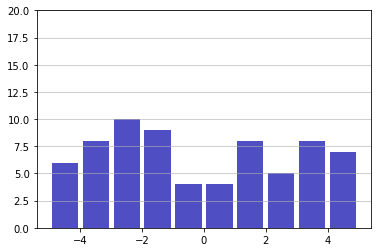

In [3]:
# Check if all ranges are represented?
n, bins, patches = plt.hist(x=norm_genome, bins=[i for i in range(-5, 6)], color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
maxfreq = n.max()

plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

[2.4117647058823533, -0.33333333333333304, -4.686274509803922, 4.529411764705882, 4.372549019607844, -1.5882352941176467, 4.686274509803921, -4.450980392156863, -2.9607843137254903, 2.3725490196078436, -3.0784313725490193, 4.76470588235294, -1.2352941176470589, 1.6274509803921564, -4.176470588235294, 0.9607843137254903, 4.882352941176471, 1.7450980392156872, -1.941176470588235, -4.411764705882353, -2.450980392156863, 2.6470588235294112, -2.215686274509804, 1.0, 3.862745098039216, -3.0784313725490193, -4.490196078431373, -0.4901960784313726, -0.17647058823529438, -1.3137254901960782, -2.9215686274509802, 0.21568627450980404, 3.0392156862745097, 3.2745098039215677, -0.33333333333333304, -2.2549019607843137, 3.117647058823529, -0.41176470588235325, 0.9215686274509807, -2.5294117647058822, -4.8431372549019605, -2.215686274509804, 4.607843137254902, 4.215686274509803, 2.568627450980392, 0.6078431372549016, 2.098039215686275, -4.098039215686274, -1.9803921568627452, 3.784313725490197, 2.6470

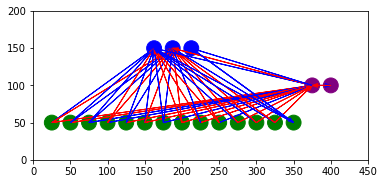

In [9]:
# The MN network
ann = MN_controller(genome)
# There should be 19 nodes and 48 connections
print([normalize(g) for g in ann.genome]) 
# the biases and connection weights should correspond; not the time constants though
for k, v in ann.nodes.items():
    print(k, ':', v)
for k, v in ann.connections.items():
    print(k, ':', v)
ann.show()

Corrected.
0 : {'activation': [0, 0.0], 'name': 'IR_0', 'time_const_locus': 0, 'type': 'sensory', 'time_const': 0.611764705882353}
1 : {'activation': [0, 0.0], 'name': 'IR_1', 'time_const_locus': 1, 'type': 'sensory', 'time_const': 0.20784313725490197}
2 : {'activation': [0, 0.0], 'name': 'IR_2', 'time_const_locus': 2, 'type': 'sensory', 'time_const': 0.11372549019607843}
3 : {'activation': [0, 0.0], 'name': 'IR_3', 'time_const_locus': 3, 'type': 'sensory', 'time_const': 0.5058823529411764}
4 : {'activation': [0, 0.0], 'name': 'IR_4', 'time_const_locus': 4, 'type': 'sensory', 'time_const': 0.4392156862745098}
5 : {'activation': [0, 0.0], 'name': 'IR_5', 'time_const_locus': 5, 'type': 'sensory', 'time_const': 0.21568627450980393}
6 : {'activation': [0, 0.0], 'name': 'IR_6', 'time_const_locus': 6, 'type': 'sensory', 'time_const': 0.5568627450980392}
7 : {'activation': [0, 0.0], 'name': 'IR_7', 'time_const_locus': 7, 'type': 'sensory', 'time_const': 0.2784313725490196}
8 : {'activation': 

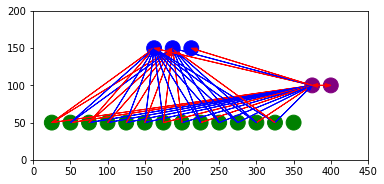

In [24]:
# The same network structure, but with comm_self node connections disabled
ann_ns = MN_controller(genome, comm_self_connected=False)
# There should be 19 nodes and 44 connections
for k, v in ann_ns.nodes.items():
    print(k, ':', v)
for k, v in ann_ns.connections.items():
    print(k, ':', v)
ann_ns.show()

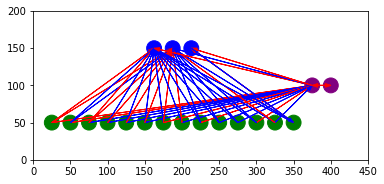

In [14]:
# compare & see if it's still the same
ann.show()

[1.5098039215686274, -1.3137254901960782, -4.215686274509804, 1.2352941176470589, -0.4901960784313726, -1.2745098039215685, 2.215686274509804, -4.411764705882353, 2.1372549019607847, -2.5294117647058822, 0.17647058823529438, -1.9803921568627452, 2.450980392156863, -2.294117647058824, 3.0784313725490193, -3.0, -4.333333333333333, 3.0784313725490193, 3.1960784313725483, 4.568627450980392, 3.5882352941176467, -0.13725490196078471, 4.294117647058824, 1.0392156862745097, -3.3529411764705883, -0.4509803921568629, -0.6862745098039209, 2.568627450980392, -4.215686274509804, 3.5882352941176467, -0.41176470588235325, 1.4705882352941178, 4.76470588235294, 3.5098039215686274, 1.4705882352941178, -1.784313725490196, -2.7254901960784315, -0.8431372549019605, -1.4705882352941173, -3.4705882352941178, 2.333333333333333, 1.7058823529411757, -4.372549019607844, 4.921568627450981, -3.2745098039215685, -0.7647058823529411, 3.235294117647058, 1.5882352941176467, -2.294117647058824, -1.666666666666667, -0.6

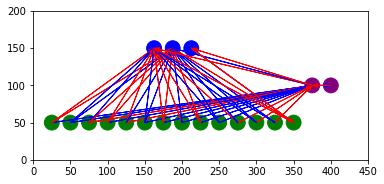

In [19]:
# Check random network also works
ra = MN_controller(random=True)
print([normalize(g) for g in ra.genome])
for k, v in ra.nodes.items():
    print(k, ':', v)
for k, v in ra.connections.items():
    print(k, ':', v)
ra.show()

[-1.8627450980392157, 2.0588235294117654, -4.568627450980392, -4.803921568627451, 0.3725490196078427, 3.8235294117647065, 0.4901960784313726, 0.2549019607843137, 3.627450980392158, -2.4901960784313726, -1.2352941176470589, 4.647058823529411, 2.803921568627451, 4.607843137254902, 4.921568627450981, 0.5686274509803919, -3.4705882352941178, -3.0784313725490193, -0.882352941176471, -1.666666666666667, -1.4313725490196076, -4.568627450980392, -0.6470588235294112, 3.549019607843137, -2.9215686274509802, -1.1176470588235294, -0.7254901960784315, -0.33333333333333304, 4.80392156862745, 4.686274509803921, 3.627450980392158, 0.41176470588235237, -0.0588235294117645, 4.294117647058824, 1.2745098039215685, 0.2549019607843137, 1.8627450980392162, -3.0392156862745097, -0.5294117647058822, 4.098039215686274, 4.882352941176471, 0.6470588235294112, -0.6078431372549016, 1.549019607843137, 4.137254901960784, -4.8431372549019605, -1.823529411764706, 4.0588235294117645, -3.549019607843137, 1.31372549019607

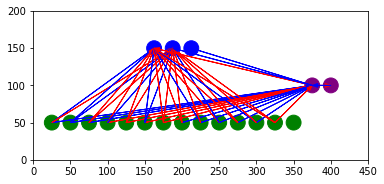

In [20]:
ra_nc = MN_controller(comm_self_connected=False, random=True)
print([normalize(g) for g in ra_nc.genome])
for k, v in ra_nc.nodes.items():
    print(k, ':', v)
for k, v in ra_nc.connections.items():
    print(k, ':', v)
ra_nc.show()

In [10]:
# check the sensor to motor function
inputs = [0] * 13
print(inputs)
for i in range(10):
    ann.propagate(inputs)
    for k, v in ann.nodes.items():
        print(k, ':', v['activation'])
    for k, v in ann.connections.items():
        if k in [14, 15, 16, 18]:
            print(k, ':', v)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
comm_self signal:0, activation:0.0
0 : [0, 0.0]
1 : [0, 0.0]
2 : [0, 0.0]
3 : [0, 0.0]
4 : [0, 0.0]
5 : [0, 0.0]
6 : [0, 0.0]
7 : [0, 0.0]
8 : [0, 0.0]
9 : [0, 0.0]
10 : [0, 0.0]
11 : [0, 0.0]
12 : [0, 0.0]
13 : [0, 0.0]
14 : [0, 0, 0.9107443816962384]
15 : [0, 0, 0.3438719442283687]
16 : [0, 0, 0.12551866581277363]
17 : [0, 0, 0.01198828412512566]
18 : [0, 0, 0.07936688455569159]
14 : {'input': 4, 'mode': 'sensor_to_motor', 'output': 17, 'weight_locus': 35, 'weight': -2.2549019607843137}
15 : {'input': 5, 'mode': 'sensor_to_internal', 'output': 14, 'weight_locus': 36, 'weight': 3.117647058823529}
16 : {'input': 5, 'mode': 'sensor_to_motor', 'output': 16, 'weight_locus': 37, 'weight': -0.41176470588235325}
18 : {'input': 6, 'mode': 'sensor_to_internal', 'output': 14, 'weight_locus': 39, 'weight': -2.5294117647058822}
comm_self signal:0, activation:0.0
0 : [0, 0.0, 0.0]
1 : [0, 0.0, 0.0]
2 : [0, 0.0, 0.0]
3 : [0, 0.0, 0.0]
4 : [0, 0.0, 0.0]
5 : [0

In [5]:
# check the sensor to motor function
inputs = [1] * 13
print(inputs)
for i in range(10):
    ann.propagate(inputs)
    for k, v in ann.nodes.items():
        print(k, ':', v['activation'])
    for k, v in ann.connections.items():
        if k in [14, 15, 16, 18]:
            print(k, ':', v)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
uh comm_self input is 0.4024452596012061
comm_self signal:0.4024452596012061, activation:0.18029720876473387
0 : [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6901960784313725]
1 : [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6313725490196078]
2 : [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6666666666666667]
3 : [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13725490196078427]
4 : [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15294117647058825]
5 : [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19999999999999996]
6 : [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9254901960784314]
7 : [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9333333333333333]
8 : [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6274509803921569]
9 : [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14901960784313728]
10 : [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.858823

In [7]:
for k, v in ann.connections.items():
    if v['input'] in [13, 14, 15, 18]:
        print(k, v)
        print(ann.nodes[v['output']])

39 {'input': 13, 'mode': 'sensor_to_motor', 'output': 16, 'weight_locus': 60, 'weight': -3.235294117647059}
{'activation': [0, 0, 0.2464479907627977, 0.2349333581677672, 0.21839921632900094, 0.20425936260023891, 0.19202421469072642, 0.18135402552102672, 0.17201231818679277, 0.16380940527589147, 0.15658662956518532, 0.1502099392609503, 0.05533678184210633, 0.015096234792138678, 0.005519314756717738, 0.0026775462409903902, 0.0015578455382265636, 0.001019952881960742, 0.0007240382342897805, 0.0005447149493423379, 0.00042786541600915246, 0.00034727550891668557], 'bias_locus': 18, 'name': 'motor_left', 'type': 'motor', 'bias': -1.1176470588235294}
40 {'input': 13, 'mode': 'sensor_to_motor', 'output': 17, 'weight_locus': 61, 'weight': -4.490196078431373}
{'activation': [0, 0, 0.9884674289197273, 0.9872442884344763, 0.9854480693240151, 0.9836509503427003, 0.9818381091836891, 0.9800138702435639, 0.9781909297758583, 0.9763828317011449, 0.9746020011423585, 0.972859255445819, 0.999133510416693, 0

In [10]:
for k, v in ann.nodes.items():
    print(k, v['activation'][:11])
    print(k, v['activation'][11:])


0 [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0 [0.6901960784313725, 0.9040215301806998, 0.9702654936638246, 0.9907881333311457, 0.9971461275810216, 0.9991158591329439, 0.9997260896921669, 0.9999151415124752, 0.9999737105077864, 0.9999918554122162]
1 [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1 [0.6313725490196078, 0.8641138023836985, 0.949908617349285, 0.9815349412973835, 0.9931932724782512, 0.9974908533841397, 0.9990750596788593, 0.999659041607109, 0.9998743133767383, 0.9999536684604446]
2 [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2 [0.6666666666666667, 0.888888888888889, 0.962962962962963, 0.9876543209876544, 0.9958847736625516, 0.9986282578875172, 0.9995427526291725, 0.9998475842097242, 0.9999491947365748, 0.9999830649121917]
3 [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3 [0.13725490196078427, 0.255670895809304, 0.3578337140315564, 0.4459741846546761, 0.5220169436236421, 0.5876224611654952, 0.6442232998290547, 0.6930553959309491, 0.735185

# Get Outputs

In [1]:
from Agent import agent
from Environment import environment
from Controller import MN_controller
import random as rd
from Helper import normalize

env = environment()

rob1 = agent((3, 10), 45, name='robot1', test_mode=True)
rob2 = agent((9, 9), 135, name='robot2', test_mode=True)
rob3 = agent((3, 4), 90, name='robot3', test_mode=True)
rob4 = agent((9, 3), 90, name='robot4', test_mode=True)

env.agents=[rob1, rob2, rob3, rob4]
env.show(15, 15, verbose=True)

for a in env.agents:
    a.comm_output = rd.uniform(0, 1)
    print(a.name, a.comm_output)

robot1 0.718311578385458
robot2 0.7796379804469575
robot3 0.42504895107751584
robot4 0.27483632352081766


True
19
48
69
[0.6470588235294112, 2.450980392156863, -4.96078431372549, -3.3529411764705883, -4.0588235294117645, -4.96078431372549, 1.2352941176470589, -1.5098039215686274, 4.0588235294117645, -4.607843137254902, 0.8431372549019613, -1.823529411764706, 4.607843137254902, -2.8823529411764706, 4.84313725490196, -1.0784313725490198, -0.7254901960784315, -1.9803921568627452, 3.862745098039216, -1.1960784313725492, -0.7647058823529411, -2.2549019607843137, 3.745098039215687, 4.098039215686274, 2.803921568627451, -3.784313725490196, -3.784313725490196, 2.1372549019607847, 2.0588235294117654, -2.372549019607843, 2.6078431372549016, -4.411764705882353, 2.568627450980392, 0.8039215686274517, -2.2549019607843137, 0.33333333333333304, 0.41176470588235237, 4.490196078431373, -4.137254901960784, 4.411764705882353, -1.9803921568627452, 0.21568627450980404, 3.784313725490197, -4.176470588235294, -1.156862745098039, 0.4901960784313726, 3.5882352941176467, 4.647058823529411, -3.588235294117647, 0.215

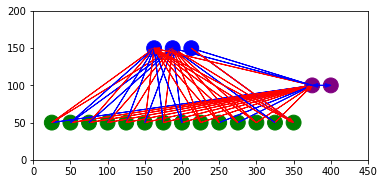

In [2]:
print(rob1.ann.comm_self_connected)
print(len(rob1.ann.nodes))
print(len(rob1.ann.connections))
print(len(rob1.ann.genome))
rob1.ann.show()
print([normalize(g) for g in rob1.ann.genome])
for k, v in rob1.ann.nodes.items():
    print(k, v)
for k, v in rob1.ann.connections.items():
    print(k, v)

In [3]:
from Controller import G_to_P
nc = G_to_P(rob1.ann.genome, rob1.ann.nodes, rob1.ann.connections)
rob1.ann.nodes = nc[0]
rob1.ann.connections = nc[1]
print([normalize(g) for g in rob1.ann.genome])

for k, v in rob1.ann.nodes.items():
    print(k, v)
    
for k, v in rob1.ann.connections.items():
    print(k, v)

[0.6470588235294112, 2.450980392156863, -4.96078431372549, -3.3529411764705883, -4.0588235294117645, -4.96078431372549, 1.2352941176470589, -1.5098039215686274, 4.0588235294117645, -4.607843137254902, 0.8431372549019613, -1.823529411764706, 4.607843137254902, -2.8823529411764706, 4.84313725490196, -1.0784313725490198, -0.7254901960784315, -1.9803921568627452, 3.862745098039216, -1.1960784313725492, -0.7647058823529411, -2.2549019607843137, 3.745098039215687, 4.098039215686274, 2.803921568627451, -3.784313725490196, -3.784313725490196, 2.1372549019607847, 2.0588235294117654, -2.372549019607843, 2.6078431372549016, -4.411764705882353, 2.568627450980392, 0.8039215686274517, -2.2549019607843137, 0.33333333333333304, 0.41176470588235237, 4.490196078431373, -4.137254901960784, 4.411764705882353, -1.9803921568627452, 0.21568627450980404, 3.784313725490197, -4.176470588235294, -1.156862745098039, 0.4901960784313726, 3.5882352941176467, 4.647058823529411, -3.588235294117647, 0.21568627450980404

In [8]:
print('Pre: Ground: {}, IR:{}, Comm: {}'.format(
    rob1.ground_reading, rob1.ir_readings, rob1.comm_readings))
rob1.get_ground_reading(env)
rob1.get_ir_readings(env)
rob1.get_comm_readings(env)
print('Post: Ground: {}, IR:{}, Comm: {}'.format(
    rob1.ground_reading, rob1.ir_readings, rob1.comm_readings))

Pre: Ground: 0, IR:[0, 0, 0, 0, 0, 0, 0, 0], Comm: [0, 0, 0, 0]
Post: Ground: 0, IR:[0.3198435483169847, 0, 0, 0, 0.6975497207051635, 0.6152291536303246, 0.3846039172768714, 0.7588016289066075], Comm: [0, 0, 0, 0.7796379804469575]


In [9]:
for k, v in rob1.ann.nodes.items():
    print(k, v)

0 {'activation': [0], 'name': 'IR_0', 'time_const_locus': 0, 'type': 'sensory', 'time_const': 0.5647058823529412}
1 {'activation': [0], 'name': 'IR_1', 'time_const_locus': 1, 'type': 'sensory', 'time_const': 0.7450980392156863}
2 {'activation': [0], 'name': 'IR_2', 'time_const_locus': 2, 'type': 'sensory', 'time_const': 0.00392156862745098}
3 {'activation': [0], 'name': 'IR_3', 'time_const_locus': 3, 'type': 'sensory', 'time_const': 0.16470588235294117}
4 {'activation': [0], 'name': 'IR_4', 'time_const_locus': 4, 'type': 'sensory', 'time_const': 0.09411764705882353}
5 {'activation': [0], 'name': 'IR_5', 'time_const_locus': 5, 'type': 'sensory', 'time_const': 0.00392156862745098}
6 {'activation': [0], 'name': 'IR_6', 'time_const_locus': 6, 'type': 'sensory', 'time_const': 0.6235294117647059}
7 {'activation': [0], 'name': 'IR_7', 'time_const_locus': 7, 'type': 'sensory', 'time_const': 0.34901960784313724}
8 {'activation': [0], 'name': 'comm_0', 'time_const_locus': 8, 'type': 'sensory', '

In [10]:
print('Pre: wheel_left: {}, wheel_right:{}, comm_out: {}'.format(rob1.left_output, rob1.right_output, rob1.comm_output))
rob1.get_output()
print('Post: wheel_left: {}, wheel_right:{}, comm_out: {}'.format(rob1.left_output, rob1.right_output, rob1.comm_output))

Pre: wheel_left: 0, wheel_right:0, comm_out: 0.718311578385458
comm_self signal:0, activation:0.0
Post: wheel_left: 0.9919269002867103, wheel_right:0.06756525344872408, comm_out: 0.31762544130504883


In [18]:
for k, v in rob1.ann.nodes.items():
    print(k, v)

0 {'activation': [0, 0.13922601514974628], 'name': 'IR_0', 'time_const_locus': 0, 'type': 'sensory', 'time_const': 0.5647058823529412}
1 {'activation': [0, 0.0], 'name': 'IR_1', 'time_const_locus': 1, 'type': 'sensory', 'time_const': 0.7450980392156863}
2 {'activation': [0, 0.0], 'name': 'IR_2', 'time_const_locus': 2, 'type': 'sensory', 'time_const': 0.00392156862745098}
3 {'activation': [0, 0.0], 'name': 'IR_3', 'time_const_locus': 3, 'type': 'sensory', 'time_const': 0.16470588235294117}
4 {'activation': [0, 0.631897982285854], 'name': 'IR_4', 'time_const_locus': 4, 'type': 'sensory', 'time_const': 0.09411764705882353}
5 {'activation': [0, 0.6128164902827548], 'name': 'IR_5', 'time_const_locus': 5, 'type': 'sensory', 'time_const': 0.00392156862745098}
6 {'activation': [0, 0.14479206297482217], 'name': 'IR_6', 'time_const_locus': 6, 'type': 'sensory', 'time_const': 0.6235294117647059}
7 {'activation': [0, 0.49396498195488964], 'name': 'IR_7', 'time_const_locus': 7, 'type': 'sensory', '

In [11]:
print(rob1.ann.genome)
print(rob2.ann.genome)

[144, 190, 1, 42, 24, 1, 159, 89, 231, 10, 149, 81, 245, 54, 251, 100, 109, 77, 226, 97, 108, 70, 223, 232, 199, 31, 31, 182, 180, 67, 194, 15, 193, 148, 70, 136, 138, 242, 22, 240, 77, 133, 224, 21, 98, 140, 219, 246, 36, 133, 238, 3, 255, 218, 139, 197, 169, 152, 184, 115, 186, 153, 44, 72, 144, 77, 11, 63, 192]
[119, 184, 151, 104, 173, 164, 241, 133, 149, 106, 166, 115, 196, 224, 17, 210, 203, 104, 17, 162, 6, 90, 93, 169, 98, 228, 117, 16, 34, 160, 127, 73, 41, 179, 21, 50, 181, 21, 9, 31, 139, 205, 103, 150, 218, 144, 1, 168, 138, 151, 5, 100, 129, 64, 186, 174, 193, 94, 132, 175, 126, 134, 241, 95, 36, 38, 33, 179, 78]


Corrected.


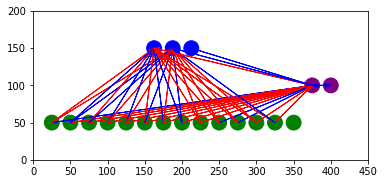

In [12]:
# swap network for one without comm_self connections
genome = rob1.ann.genome
rob5 = agent((3, 10), 45, name='robot1b')
rob5.ann = MN_controller(genome=genome, comm_self_connected=False)
rob5.ann.show()

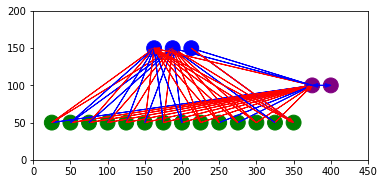

In [13]:
rob1.ann.show()

In [14]:
print(rob5.ann.comm_self_connected)
print(len(rob5.ann.nodes))
print(len(rob5.ann.connections))
print(len(rob5.ann.genome))
print([normalize(g) for g in rob5.ann.genome])
for k, v in rob5.ann.nodes.items():
    print(k, v)
for k, v in rob5.ann.connections.items():
    print(k, v)

False
19
44
65
[0.6470588235294112, 2.450980392156863, -4.96078431372549, -3.3529411764705883, -4.0588235294117645, -4.96078431372549, 1.2352941176470589, -1.5098039215686274, 4.0588235294117645, -4.607843137254902, 0.8431372549019613, -1.823529411764706, 4.607843137254902, -2.8823529411764706, 4.84313725490196, -1.0784313725490198, -0.7254901960784315, -1.9803921568627452, 3.862745098039216, -1.1960784313725492, -0.7647058823529411, -2.2549019607843137, 3.745098039215687, 4.098039215686274, 2.803921568627451, -3.784313725490196, -3.784313725490196, 2.1372549019607847, 2.0588235294117654, -2.372549019607843, 2.6078431372549016, -4.411764705882353, 2.568627450980392, 0.8039215686274517, -2.2549019607843137, 0.33333333333333304, 0.41176470588235237, 4.490196078431373, -4.137254901960784, 4.411764705882353, -1.9803921568627452, 0.21568627450980404, 3.784313725490197, -4.176470588235294, -1.156862745098039, 0.4901960784313726, 3.5882352941176467, 4.647058823529411, -3.588235294117647, 0.21

In [15]:
print('Pre: Ground: {}, IR:{}, Comm: {}'.format(
    rob5.ground_reading, rob5.ir_readings, rob5.comm_readings))
rob5.get_ground_reading(env)
rob5.get_ir_readings(env)
rob5.get_comm_readings(env)
print('Post: Ground: {}, IR:{}, Comm: {}'.format(
    rob5.ground_reading, rob5.ir_readings, rob5.comm_readings))

Pre: Ground: 0, IR:[0, 0, 0, 0, 0, 0, 0, 0], Comm: [0, 0, 0, 0]
Post: Ground: 0, IR:[0.3198435483169847, 0, 0, 0, 0.6975497207051635, 0.6152291536303246, 0.3846039172768714, 0.7588016289066075], Comm: [0.31762544130504883, 0, 0, 0.7796379804469575]


In [16]:
print('Pre: wheel_left: {}, wheel_right:{}, comm_out: {}'.format(rob5.left_output, 
                                                                 rob5.right_output, 
                                                                 rob5.comm_output))
rob5.get_output()
print('Post: wheel_left: {}, wheel_right:{}, comm_out: {}'.format(rob5.left_output, 
                                                                  rob5.right_output, 
                                                                  rob5.comm_output))

Pre: wheel_left: 0, wheel_right:0, comm_out: 0
comm_self signal:0, activation:0.0
Post: wheel_left: 0.9927420913474204, wheel_right:0.07686070313223779, comm_out: 0.31762544130504883


In [17]:
for k, v in rob5.ann.nodes.items():
    print(k, v)

0 {'activation': [0, 0.13922601514974628], 'name': 'IR_0', 'time_const_locus': 0, 'type': 'sensory', 'time_const': 0.5647058823529412}
1 {'activation': [0, 0.0], 'name': 'IR_1', 'time_const_locus': 1, 'type': 'sensory', 'time_const': 0.7450980392156863}
2 {'activation': [0, 0.0], 'name': 'IR_2', 'time_const_locus': 2, 'type': 'sensory', 'time_const': 0.00392156862745098}
3 {'activation': [0, 0.0], 'name': 'IR_3', 'time_const_locus': 3, 'type': 'sensory', 'time_const': 0.16470588235294117}
4 {'activation': [0, 0.631897982285854], 'name': 'IR_4', 'time_const_locus': 4, 'type': 'sensory', 'time_const': 0.09411764705882353}
5 {'activation': [0, 0.6128164902827548], 'name': 'IR_5', 'time_const_locus': 5, 'type': 'sensory', 'time_const': 0.00392156862745098}
6 {'activation': [0, 0.14479206297482217], 'name': 'IR_6', 'time_const_locus': 6, 'type': 'sensory', 'time_const': 0.6235294117647059}
7 {'activation': [0, 0.49396498195488964], 'name': 'IR_7', 'time_const_locus': 7, 'type': 'sensory', '

# Wheel to Movement

initial: x=100, y=100, ang=90

mode:  slow

final: x=99.79574683610993, y=148.0240775156062, ang=94.12952400265625


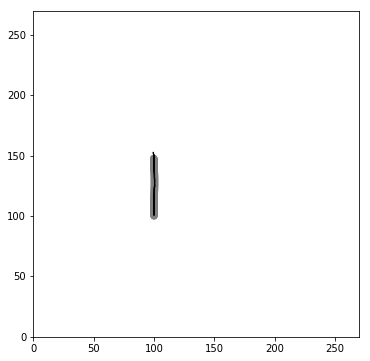

In [22]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrow
from Helper import *

rob = agent((100, 100), 90, name='robot1')
print('initial: x={}, y={}, ang={}\n'.format(rob.loc[0], rob.loc[1], rob.ang))

loc = []
ang = []

mode = 'slow'
# mode = rd.choice(['straight', 'fast', 'slow', 'left', 'right'])

# go straight
if mode == 'straight':
    rob.left_output = 0.5
    rob.right_output = 0.5

# go faster
if mode == 'fast':
    rob.left_output = 0.8
    rob.right_output = 0.8

# go slower
if mode == 'slow':
    rob.left_output = 0.3
    rob.right_output = 0.3

# go left
if mode == 'left':
    rob.left_output = 0.4
    rob.right_output = 0.5

# go right
if mode == 'right':
    rob.left_output = 0.5
    rob.right_output = 0.4

for i in range(200):
    loc.append(rob.loc)
    ang.append(rob.ang)
    #rob.update_loc(verbose=True)    
    rob.update_loc(env=env)    

# plot out the agent in a 50 * 50 environment
ax = plt.axes(xlim=(0, 270), ylim=(0, 270))
line, = ax.plot([], [])

print('mode: ', mode)
for i in range(len(loc)):
    ax.add_patch(Circle(loc[-i], rob.r, color='gray'))
    ax.add_patch(FancyArrow(loc[-i][0], loc[-i][1],
                                find_dx(loc[-i][0], ang[-i], rob.r*2),
                                find_dy(loc[-i][1], ang[-i], rob.r*2),
                                color='black',
                                length_includes_head=True,
                                head_width=0.2))
        
print('\nfinal: x={}, y={}, ang={}'.format(rob.loc[0], rob.loc[1], rob.ang))
ax.set_aspect('equal')
ax.figure.set_size_inches(6, 6)

# Wall collision

* do not have agent collision as of now


final: x=2.6, y=263.7712671722453, ang=207.10442184098014


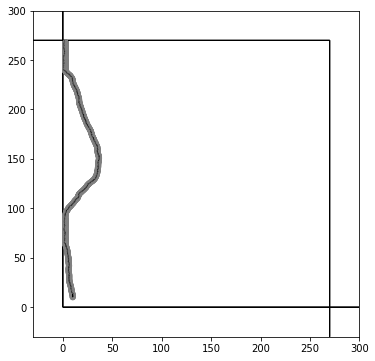

In [23]:
rob = agent((10, 10), 90, name='robot1')

loc = []
ang = []

# random
for i in range(1000):
    rob.left_output = rd.uniform(0, 1)
    rob.right_output = rd.uniform(0, 1)

    loc.append(rob.loc)
    ang.append(rob.ang)
    rob.update_loc(env=env, iteration_time=0.1)    
    #print('')

# plot out the agent in a 50 * 50 environment
ax = plt.axes(xlim=(-30, 300), ylim=(-30, 300))
line, = ax.plot([], [])

ax.add_patch(FancyArrow(0, 0, 300, 0, color='black'))
ax.add_patch(FancyArrow(0, 0, 0, 300, color='black'))
ax.add_patch(FancyArrow(270, 270, 0, -300, color='black'))
ax.add_patch(FancyArrow(270, 270, -300, 0, color='black'))


for i in range(len(loc)):
    ax.add_patch(Circle(loc[-i], rob.r, color='gray'))
    ax.add_patch(FancyArrow(loc[-i][0], loc[-i][1],
                                find_dx(loc[-i][0], ang[-i], rob.r),
                                find_dy(loc[-i][1], ang[-i], rob.r),
                                color='black',
                                length_includes_head=True,
                                head_width=0.2))
        
print('\nfinal: x={}, y={}, ang={}'.format(rob.loc[0], rob.loc[1], rob.ang))
ax.set_aspect('equal')
ax.figure.set_size_inches(6, 6)


# Trial

In [12]:
from Environment import environment
from Agent import agent
from Controller import MN_controller
from Trial import trial

import random as rd
import math
from matplotlib import pyplot as plt
from matplotlib.patches import Circle, FancyArrow
from Helper import *

from tqdm import tqdm

In [13]:
ann = MN_controller(random=True)

### Comm_self connected, normal condition

In [15]:
%%time
t = trial(ann, verbose=True)

CPU times: user 4.25 ms, sys: 6 µs, total: 4.25 ms
Wall time: 4.27 ms


CPU times: user 936 ms, sys: 9.74 ms, total: 945 ms
Wall time: 1.01 s


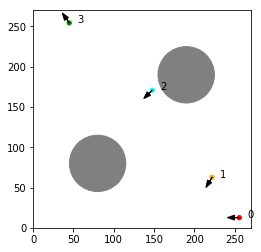

In [16]:
%%time
t.run()

In [17]:
%%time
t_standard = trial(ann)

CPU times: user 1.82 ms, sys: 106 µs, total: 1.93 ms
Wall time: 1.94 ms


In [21]:
%%time
t_standard.run()

CPU times: user 798 ms, sys: 7.73 ms, total: 806 ms
Wall time: 898 ms


95.75
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

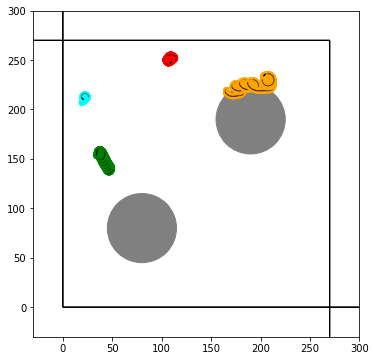

In [8]:
print(t.fitness)
print(t.step_fitness)
t.show()

In [10]:
# make sure comm sensors were always on
for n in [8, 9, 10, 11]:
    print(t.env.agents[0].ann.nodes[n]['activation'][:100])

[0, 0.0, 0.04557316619105931, 0.0887690512147001, 0.13349584722641256, 0.17751036294115788, 0.22012127080250865, 0.2609409639590909, 0.2998033696158039, 0.33666006112113606, 0.3715282488826584, 0.4044615437900379, 0.43553331324957284, 0.46482694624267074, 0.49243060737682726, 0.5184324073989562, 0.5429191597510035, 0.5659750984252039, 0.5876811626364747, 0.6081146231801089, 0.6273489262635562, 0.6454536738854059, 0.6624946887642805, 0.6785341302369571, 0.6936308811159652, 0.7078398746522679, 0.721213211423868, 0.7338000049096899, 0.7456464977427673, 0.7567962146441958, 0.7672901235096729, 0.7771667866684264, 0.7864625019352769, 0.79521143495564, 0.8034457438049452, 0.8111956964456463, 0.8184897814536283, 0.825354812367934, 0.8318160260002402, 0.8378971750297609, 0.8436206151984574, 0.8490073874093724, 0.7990657763852916, 0.7520619071861568, 0.707822971469324, 0.6661863260887756, 0.626998895142377, 0.5901166071928254, 0.5554038655932475, 0.5227330499701153, 0.4919840470306967, 0.4630438

### Comm_self connected, comm sensors disabled condition

In [5]:
t_no_comm = trial(ann, comm_disabled=True)
t_no_comm.run()

128.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0

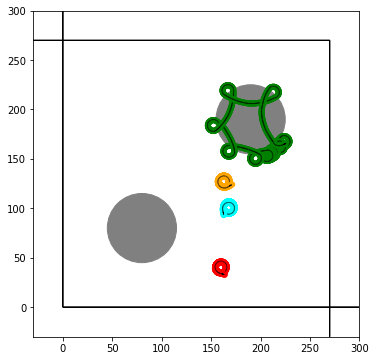

In [6]:
print(t_no_comm.fitness)
print(t_no_comm.step_fitness)
t_no_comm.show()

In [9]:
# make sure comm sensors were always muted
for n in [8, 9, 10, 11]:
    print(t_no_comm.env.agents[0].ann.nodes[n]['activation'][:100])

[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0

## Comm_self disconnected

In [11]:
genome = ann.genome
ann_no_comm_self = MN_controller(genome, comm_self_connected=False)

Corrected.


### Comm_self disconnected, normal condition

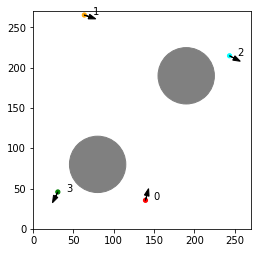

In [27]:
t_nc_norm = trial(ann_no_comm_self, verbose=True)
t_nc_norm.run()

30.75
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0

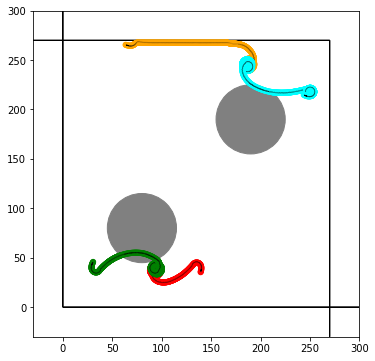

In [28]:
print(t_nc_norm.fitness)
print(t_nc_norm.step_fitness)
t_nc_norm.show()

In [31]:
# make sure comm sensors were always on 
print(t_nc_norm.comm_disabled)
for r in range(4):
    for n in [8, 9, 10, 11]:
        print(t_nc_norm.env.agents[r].ann.nodes[n]['activation'][:100])

False
[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.046083614357816646, 0.08945885539220089, 0.13029185491789896, 0.16873092793365907, 0.15880557923167912, 0.14946407457099212, 0.14067207018446318, 0.13239724252655358, 0.17073773827421684, 0.16069434190514525, 0.19740391426669734, 0.1857919193098328, 0.22101943482831396, 0.20801829160311902, 0.241937215653388, 0.22770561473260045, 0.2604746433128388, 0.24515260547090711, 0.2768892219406234, 0.2606016206499985, 0.2914280718034229, 0.2742852440502804, 0.30430697189735, 0.2864065617857412, 0.31571565296004916, 0.2971441439623992, 0.3258219663704258, 0.30665596834863607, 0.2886173819751869, 0.2716398889178229, 0.25566107192265686, 0.24062218533897115, 0.27262561602295626, 0.2565888150804294, 0.28765322183192615, 0.27073244407710695, 0.30097127200366447, 0.2832670795328607, 0.3127634948701019, 0.2943656422306841, 0.27705001621711445, 0.2

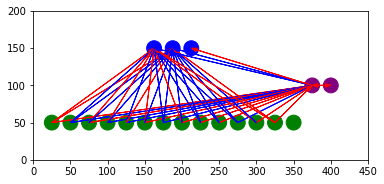

In [24]:
# make sure comm self were off
t_nc_norm.ann.show()

### Comm_self disconnected, no comm condition

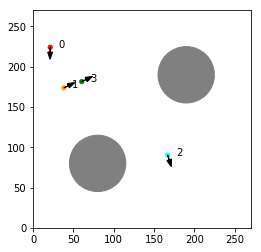

In [32]:
t_nc_nc = trial(ann_no_comm_self, comm_disabled=True, verbose=True)
t_nc_nc.run()

0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

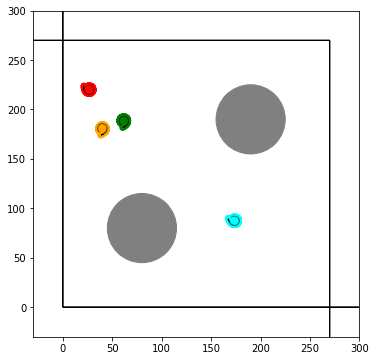

In [33]:
print(t_nc_nc.fitness)
print(t_nc_nc.step_fitness)
t_nc_nc.show()

In [35]:
# make sure comm sensors were always off
print(t_nc_nc.comm_disabled)
for r in range(4):
    for n in [8, 9, 10, 11]:
        print(t_nc_nc.env.agents[r].ann.nodes[n]['activation'][:100])

True
[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

# Animate Trial

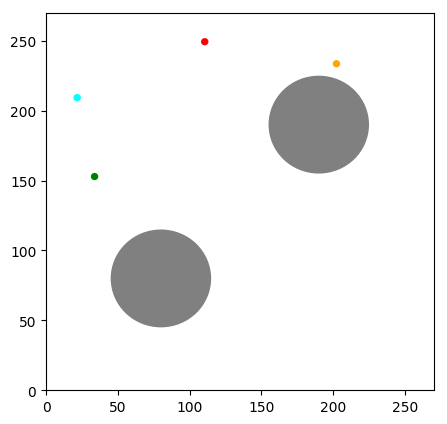

In [37]:
from Animate import animate
import datetime

d = datetime.datetime.today()
animate(t, str(d))

# Experiment

1. initial genome (100)
2. run 100 populations for gen 1 (given their genotypes)
3. select top 20 genome types
4. get gen 2 genotypes - induce variations via random selection
5. run 100 populations for gen 2 (given their genotypes)

In [1]:
from Environment import environment
from Agent import agent
from Controller import MN_controller
from Trial import trial
from Experiment import experiment

import random as rd
import pickle  
import math
from matplotlib import pyplot as plt
from matplotlib.patches import Circle, FancyArrow
from Helper import *
from copy import deepcopy

from tqdm import tqdm

In [4]:
fg_69 = []
for i in range(10):
    fg_69.append(rd.choices(range(0, 256), k=69))

In [3]:
e = experiment(condition='comm',
               comm_self_connected = True,
               run_num=5,
               first_gen = fg_69,
               today='2019_04_13',
               pop=10, gen=2, trial_num=3, include_top=2)

In [4]:
# this should return e.pop, e.genome_size (default=83)
print(len(e.genome), len(e.genome[0]))

10 69


In [5]:
# just to check that the genomes are indeed randomly generated
# the three lists should have the same length
# the three lists should also contain very different numbers
print(len(e.genome[0]), e.genome[0])
print(len(e.genome[2]), e.genome[2])
print(len(e.genome[3]), e.genome[3])

69 [156, 26, 129, 130, 173, 177, 68, 0, 9, 123, 190, 254, 231, 135, 204, 211, 186, 18, 255, 161, 50, 174, 241, 192, 211, 169, 64, 196, 3, 184, 140, 116, 185, 177, 134, 52, 247, 66, 60, 160, 95, 233, 179, 31, 229, 154, 9, 109, 135, 99, 155, 169, 109, 74, 81, 96, 230, 101, 40, 44, 99, 203, 56, 170, 34, 141, 30, 56, 230]
69 [193, 92, 81, 106, 165, 139, 12, 45, 96, 105, 73, 152, 157, 1, 203, 255, 71, 131, 126, 195, 112, 255, 70, 205, 167, 94, 146, 42, 25, 146, 54, 253, 51, 23, 144, 51, 244, 82, 214, 148, 253, 56, 240, 253, 39, 41, 40, 78, 134, 36, 107, 106, 126, 144, 242, 40, 216, 112, 220, 3, 239, 238, 60, 112, 63, 124, 79, 173, 58]
69 [224, 88, 27, 154, 97, 130, 173, 146, 208, 182, 228, 254, 154, 158, 184, 47, 54, 113, 168, 63, 175, 94, 103, 148, 110, 230, 188, 158, 25, 98, 251, 248, 77, 11, 193, 65, 200, 229, 87, 101, 242, 64, 176, 69, 89, 73, 43, 82, 25, 173, 148, 93, 132, 80, 99, 196, 108, 218, 38, 112, 100, 79, 240, 206, 31, 117, 91, 79, 192]


In [6]:
%%time
# Check get_gen_fitness function
# This runs all the behavioral trials and get fitness scores for each genotype
e.get_gen_fitness(0)

population: 1 / 10
population: 2 / 10
population: 3 / 10
population: 4 / 10
population: 5 / 10
population: 6 / 10
population: 7 / 10
population: 8 / 10
population: 9 / 10
population: 10 / 10
CPU times: user 28 s, sys: 292 ms, total: 28.3 s
Wall time: 30.8 s


In [7]:
# Check which ones have the highest fitness score
for f in e.fitness:
    print(e.genome[f[0]])
    print(f)

[156, 26, 129, 130, 173, 177, 68, 0, 9, 123, 190, 254, 231, 135, 204, 211, 186, 18, 255, 161, 50, 174, 241, 192, 211, 169, 64, 196, 3, 184, 140, 116, 185, 177, 134, 52, 247, 66, 60, 160, 95, 233, 179, 31, 229, 154, 9, 109, 135, 99, 155, 169, 109, 74, 81, 96, 230, 101, 40, 44, 99, 203, 56, 170, 34, 141, 30, 56, 230]
(0, 84.5, [152.0, 101.5, 0.0])
[116, 42, 212, 155, 143, 163, 171, 216, 13, 176, 0, 57, 155, 176, 208, 85, 255, 142, 229, 103, 41, 136, 127, 160, 64, 200, 39, 161, 201, 7, 187, 68, 89, 230, 251, 153, 101, 244, 201, 155, 244, 86, 198, 233, 248, 211, 121, 254, 230, 164, 249, 152, 86, 122, 49, 81, 89, 10, 246, 203, 131, 117, 173, 82, 66, 113, 112, 248, 89]
(1, 0.0, [0.0, 0.0, 0.0])
[193, 92, 81, 106, 165, 139, 12, 45, 96, 105, 73, 152, 157, 1, 203, 255, 71, 131, 126, 195, 112, 255, 70, 205, 167, 94, 146, 42, 25, 146, 54, 253, 51, 23, 144, 51, 244, 82, 214, 148, 253, 56, 240, 253, 39, 41, 40, 78, 134, 36, 107, 106, 126, 144, 242, 40, 216, 112, 220, 3, 239, 238, 60, 112, 63, 124, 

In [11]:
%%time
e.select_top()
# Check if these are the top ones from the fit
for g in e.top:
    print(g)

0
8
CPU times: user 152 µs, sys: 85 µs, total: 237 µs
Wall time: 168 µs


In [13]:
%%time
e.get_new_generation(0)
# The new generation should be equally divided between all top genotypes
for g in e.genome:
    print(g)

[156, 26, 129, 130, 173, 177, 68, 0, 9, 123, 190, 254, 231, 135, 204, 211, 186, 18, 255, 161, 50, 174, 241, 192, 211, 169, 64, 196, 3, 184, 140, 116, 185, 177, 134, 52, 247, 66, 60, 160, 95, 233, 179, 31, 229, 154, 9, 109, 135, 99, 155, 169, 109, 74, 81, 96, 230, 101, 40, 44, 99, 203, 56, 170, 34, 141, 30, 56, 230]
[156, 26, 129, 130, 173, 177, 68, 0, 9, 123, 190, 11, 231, 135, 204, 211, 186, 18, 255, 161, 50, 174, 241, 192, 211, 169, 64, 196, 3, 184, 140, 116, 185, 177, 134, 52, 247, 66, 60, 160, 95, 233, 179, 31, 229, 154, 9, 109, 135, 99, 155, 169, 109, 74, 81, 96, 230, 101, 40, 44, 99, 203, 56, 170, 34, 141, 30, 56, 230]
[156, 26, 129, 130, 173, 177, 68, 0, 9, 123, 190, 254, 231, 135, 152, 211, 186, 18, 255, 161, 50, 174, 241, 192, 211, 169, 64, 196, 3, 184, 140, 107, 185, 177, 134, 52, 247, 66, 60, 160, 95, 233, 179, 31, 229, 154, 9, 109, 135, 99, 155, 169, 109, 74, 81, 96, 230, 101, 40, 44, 99, 203, 56, 170, 34, 141, 30, 56, 230]
[156, 26, 129, 130, 173, 177, 68, 0, 9, 123, 190, 

In [16]:
# check how many locus got mutated
# should be 0.02 * genome size
for g in [fg_69[p] for p in e.top]:
    total = 0
    for n in e.genome:
        diff = 0
        for j in range(len(n)):
            if n[j] != g[j]:
                diff += 1
        if diff < 60:
            print('Different:', diff)
            total += diff
        elif diff == 0:
            print('Not mutated')
    print(total/5)
    print('===NEXT===')
print(0.02 * e.genome_size)

Different: 0
Different: 1
Different: 2
Different: 1
Different: 1
1.0
===NEXT===
Different: 0
Different: 1
Different: 2
Different: 2
Different: 0
1.0
===NEXT===
1.3800000000000001


# Start over and run the whole thing and inspect data

In [17]:
from Environment import environment
from Agent import agent
from Controller import MN_controller
from Trial import trial
from Experiment import experiment

import random as rd
import pickle  
import math
from matplotlib import pyplot as plt
from matplotlib.patches import Circle, FancyArrow
from Helper import *
from copy import deepcopy

from tqdm import tqdm
import pandas as pd


In [2]:
fg_69 = []
for i in range(10):
    fg_69.append(rd.choices(range(0, 256), k=69))

### comm, cs_conn

In [3]:
test_e = experiment(condition='comm',
                    comm_self_connected = True,
                    run_num=5,
                    first_gen = fg_69,
                    today='2019_04_13',
                    pop=10, gen=2, trial_num=3, include_top=2)

In [4]:
test_e.run()

current generation: 1 / 2
population: 1 / 10
population: 2 / 10
population: 3 / 10
population: 4 / 10
population: 5 / 10
population: 6 / 10
population: 7 / 10
population: 8 / 10
population: 9 / 10
population: 10 / 10
current generation: 2 / 2
population: 1 / 10
population: 2 / 10
population: 3 / 10
population: 4 / 10
population: 5 / 10
population: 6 / 10
population: 7 / 10
population: 8 / 10
population: 9 / 10
population: 10 / 10


In [24]:
for i in test_e.fitness:
    print(i)
for i in test_e.top:
    print(i)
    print(test_e.genome[i])

(0, 123.75, [104.25, 122.5, 144.5])
(1, 76.33333333333333, [0.0, 31.5, 197.5])
(2, 13.0, [0.0, 0.0, 39.0])
(3, 27.666666666666668, [0.0, 19.0, 64.0])
(4, 40.666666666666664, [27.0, 95.0, 0.0])
(5, 65.16666666666667, [0.0, 195.5, 0.0])
(6, 254.33333333333334, [353.25, 368.25, 41.5])
(7, 161.08333333333334, [129.75, 118.75, 234.75])
(8, 20.666666666666668, [55.75, 0.0, 6.25])
(9, 77.08333333333333, [0.0, 161.0, 70.25])
6
[220, 199, 54, 204, 124, 254, 39, 158, 111, 142, 145, 147, 207, 22, 19, 105, 0, 205, 254, 115, 227, 241, 50, 45, 209, 73, 164, 119, 105, 196, 71, 254, 72, 205, 175, 221, 85, 230, 165, 221, 228, 96, 66, 86, 52, 225, 38, 204, 122, 198, 178, 130, 46, 36, 178, 122, 248, 65, 45, 17, 225, 96, 188, 246, 111, 115, 86, 182, 162]
7
[220, 199, 54, 204, 124, 254, 39, 158, 111, 142, 145, 147, 207, 22, 19, 105, 0, 205, 254, 115, 227, 241, 50, 45, 209, 73, 164, 119, 105, 196, 71, 254, 72, 205, 175, 221, 85, 230, 165, 221, 228, 96, 66, 86, 52, 225, 38, 204, 122, 198, 178, 130, 46, 36, 1

In [25]:
# Check whether this fitness controlled the next generation of genomes
all_data = []

data_file = 'Data/2019_04_13_comm_cs_conn_Run5_final.genome'
df = pd.read_csv(data_file)

df[[c for c in df.columns if 'locus' in c or 'total' in c]]

,locus_0,locus_1,locus_2,locus_3,locus_4,locus_5,locus_6,locus_7,locus_8,locus_9,...,locus_59,locus_60,locus_61,locus_62,locus_63,locus_64,locus_65,locus_66,locus_67,locus_68
0,220,199,54,204,124,254,39,158,111,142,...,17,225,96,188,246,111,115,86,182,162
1,220,199,54,204,124,254,39,158,111,142,...,17,225,96,188,246,111,115,86,182,162
2,220,199,54,204,124,254,39,158,111,142,...,17,225,96,188,246,111,115,86,182,162
3,220,199,54,204,124,254,39,158,111,142,...,17,225,96,188,246,111,115,86,182,162
4,220,199,54,204,124,254,39,8,111,142,...,17,225,96,188,246,111,115,86,182,162
5,220,199,54,204,124,254,39,158,111,142,...,17,225,96,188,246,111,115,86,182,162
6,220,199,54,204,124,254,39,158,111,142,...,17,225,96,188,246,111,115,86,182,162
7,220,199,54,204,124,254,39,158,111,142,...,17,225,96,188,246,111,115,86,182,162
8,220,199,54,204,124,254,39,158,111,142,...,17,225,96,188,246,111,115,86,182,162
9,220,199,54,204,124,254,39,158,111,142,...,17,225,96,188,246,111,115,86,182,162


True
69
[3.627450980392158, 2.803921568627451, -2.8823529411764706, 3.0, -0.13725490196078471, 4.96078431372549, -3.4705882352941178, 1.1960784313725492, -0.6470588235294112, 0.5686274509803919, 0.6862745098039209, 0.7647058823529402, 3.117647058823529, -4.137254901960784, -4.254901960784314, -0.882352941176471, -5.0, 3.0392156862745097, 4.96078431372549, -0.4901960784313726, 3.901960784313726, 4.450980392156863, -3.0, -3.235294117647059, 3.1960784313725483, -2.1372549019607847, 1.431372549019608, -0.33333333333333304, -0.882352941176471, 2.686274509803922, -2.215686274509804, 4.96078431372549, -2.1764705882352944, 3.0392156862745097, 1.8627450980392162, 3.666666666666668, -1.666666666666667, 4.019607843137255, 1.4705882352941178, 3.666666666666668, 3.9411764705882355, -1.2352941176470589, -2.411764705882353, -1.6274509803921564, -2.9607843137254903, 3.8235294117647065, -3.5098039215686274, 3.0, -0.21568627450980404, 2.764705882352941, 1.9803921568627452, 0.09803921568627416, -3.196078

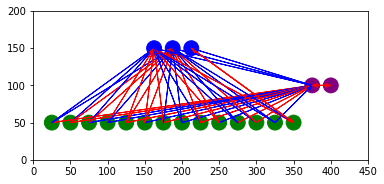

In [6]:
# The last genome ran in the trial 
# this should be True
print([normalize(g) for g in test_e.genome[-1]] == [normalize(g) for g in test_e.trial.ann.genome])
print(test_e.trial.ann.genome_size)
test_e.trial.ann.show()
print([normalize(g) for g in test_e.trial.ann.genome])

In [7]:
# check comm_sensor states
# they should all be zero
print(test_e.trial.comm_disabled)
print(test_e.trial.env.agents[0].ann.nodes[9]['name'])
print(len(test_e.trial.env.agents[0].ann.nodes[9]['activation']))

for i in [9, 10, 11, 12]:
    print(test_e.trial.env.agents[0].ann.nodes[i]['activation'][:200])

False
comm_1
1001
[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.44181688735909647, 0.6878482222575774, 0.8234195396925537, 0.898158831163083, 0.9395026110615481, 0.9624234343573057, 0.9751478808241718, 0.543023525792284, 0.30238957122550714, 0.16838948672165496, 0.09376983182147061, 0.0522169259554856, 0.029077660728152765, 0.0161922659741086, 0.009016869679699691, 0.005021158802028847, 0.002796096274070966, 0.0015570418467375576, 0.0008670585970067968, 0.00048283263049005945, 0.00026887150403760176, 0.00014972452381701746, 8.33760093412411e-05, 4.6428993437083285e-05, 2.5854576737513047e-05, 1.4397450575399422e-05, 8.017403849830267e-06, 4.46459351637607e-06, 2.486165801276086e-06, 1.3844531128674676e-06, 7.709503608909036e-07, 4.29313534300032

### comm, cs_disconn

In [8]:
from Controller import convert_genome

new_fg_65 = [convert_genome(g) for g in fg_69]

# Same for comm, comm self disconnected
test_e_nsc = experiment(condition='comm',
               comm_self_connected = False,
               run_num=5,
               first_gen = new_fg_65,
               today='2019_04_13',
               pop=10, gen=2, trial_num=3, include_top=2)
test_e_nsc.run()

current generation: 1 / 2
population: 1 / 10
population: 2 / 10
population: 3 / 10
population: 4 / 10
population: 5 / 10
population: 6 / 10
population: 7 / 10
population: 8 / 10
population: 9 / 10
population: 10 / 10
current generation: 2 / 2
population: 1 / 10
population: 2 / 10
population: 3 / 10
population: 4 / 10
population: 5 / 10
population: 6 / 10
population: 7 / 10
population: 8 / 10
population: 9 / 10
population: 10 / 10


(0, 158.41666666666666, [142.0, 333.25, 0.0])
(1, 240.08333333333334, [152.0, 165.5, 402.75])
(2, 129.91666666666666, [210.0, 153.25, 26.5])
(3, 88.0, [7.0, 128.5, 128.5])
(4, 23.0, [0.0, 23.75, 45.25])
(5, 50.916666666666664, [0.0, 152.75, 0.0])
(6, 75.33333333333333, [0.0, 28.0, 198.0])
(7, 37.75, [70.25, 0.0, 43.0])
(8, 0.0, [0.0, 0.0, 0.0])
(9, 7.916666666666667, [0.0, 23.75, 0.0])
1
0
[220, 199, 54, 204, 124, 254, 39, 158, 111, 142, 145, 147, 207, 22, 19, 105, 0, 205, 254, 115, 227, 241, 50, 45, 209, 73, 164, 119, 105, 196, 71, 254, 72, 205, 175, 221, 85, 230, 165, 221, 228, 96, 66, 86, 52, 225, 38, 204, 122, 198, 178, 130, 46, 36, 178, 122, 248, 65, 45, 17, 246, 111, 115, 86, 182]
[220, 199, 54, 204, 124, 254, 39, 158, 111, 142, 145, 147, 207, 22, 19, 105, 0, 205, 254, 115, 227, 241, 50, 45, 209, 73, 164, 119, 105, 196, 71, 254, 72, 205, 175, 221, 85, 230, 165, 221, 228, 96, 66, 86, 52, 225, 38, 204, 122, 198, 178, 130, 46, 36, 178, 122, 248, 65, 45, 17, 246, 111, 115, 86, 182]
T

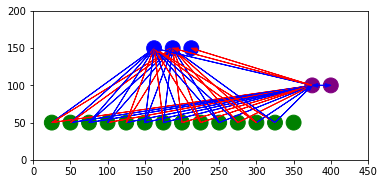

In [26]:
# Check results
for i in test_e_nsc.fitness:
    print(i)
for i in test_e_nsc.top:
    print(i)
for i in test_e_nsc.top:
    print(test_e_nsc.genome[i])
    
# this should be True
print([normalize(g) for g in test_e_nsc.genome[-1]] == [normalize(g) for g in test_e_nsc.trial.ann.genome])
print(test_e_nsc.trial.ann.genome_size)
test_e_nsc.trial.ann.show()
print([normalize(g) for g in test_e_nsc.trial.ann.genome])

In [27]:
# Check whether this fitness controlled the next generation of genomes
all_data = []

data_file = 'Data/2019_04_13_comm_cs_disconn_Run5_final.genome'
df = pd.read_csv(data_file)

df[[c for c in df.columns if 'locus' in c or 'total' in c]]

,locus_0,locus_1,locus_2,locus_3,locus_4,locus_5,locus_6,locus_7,locus_8,locus_9,...,locus_55,locus_56,locus_57,locus_58,locus_59,locus_60,locus_61,locus_62,locus_63,locus_64
0,220,199,54,204,124,254,39,158,111,142,...,122,248,65,45,17,246,111,115,86,182
1,220,199,54,204,124,254,39,158,111,142,...,122,248,65,45,17,246,111,115,86,182
2,220,199,54,204,124,254,39,158,111,142,...,122,248,65,45,17,246,111,115,86,182
3,220,199,54,204,124,254,39,158,111,142,...,122,248,65,45,15,246,111,115,86,182
4,220,199,54,143,124,254,39,158,111,142,...,122,248,65,45,17,246,111,115,86,104
5,220,199,54,204,124,254,39,158,111,90,...,122,248,65,45,17,246,111,115,86,182
6,220,199,54,204,124,254,39,158,111,142,...,122,248,65,45,17,246,111,115,86,182
7,220,199,54,204,82,254,39,158,111,142,...,122,248,65,45,17,246,111,115,86,182
8,220,199,54,204,124,254,39,158,111,142,...,122,248,65,45,17,246,111,115,86,182
9,220,199,54,204,124,254,39,158,111,142,...,122,248,65,45,17,246,111,95,86,182


In [10]:
# check comm_sensor states
# they should not all be zero
print(test_e_nsc.trial.comm_disabled)
print(test_e_nsc.trial.env.agents[0].ann.nodes[9]['name'])
print(len(test_e_nsc.trial.env.agents[0].ann.nodes[9]['activation']))

for i in [9, 10, 11, 12]:
    print(test_e_nsc.trial.env.agents[0].ann.nodes[i]['activation'][:200])

False
comm_1
1001
[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5561303982372581, 0.802586794313044, 0.9118143139152042, 0.9589117803866907, 0.9778928991888327, 0.9848861015106517, 0.98723421139295, 0.9918782892591792, 0.9930845202621723, 0.992706015760134, 0.9920076542207277, 0.9914905904791875, 0.9912333063699472, 0.99117139296198, 0.43922497021452445, 0.19463694758525985, 0.08625088265542886, 0.038220979372797885, 0.01693713987892612, 0.007505477671837849, 0.003325956772226184, 0.0014738553539668973, 0.0006531202156794486, 0.0002894218994971674, 0.00012825362605168594, 5.6833959779766706e-05, 2.5185244922014263e-05, 1.1160520298774947e-05, 4.945642328476741e-06, 2.191598365168124e-06, 9.711788833882275e-07, 4.303655444034106e-07, 1.907110059513153e-07, 8.451115165685736e-08, 3.745003975382306e-08, 1.6595507812478453e-08, 7.3540877757257454e-09, 3.2588702692431733e-09, 1.4441268251940335e-0

### no comm, comm self connected

In [11]:
%%time
# Same for comm, comm self disconnected
test_e_nc = experiment(condition='no_comm',
               comm_self_connected=True,
               run_num=5,
               first_gen = fg_69,
               today='2019_04_13',
               pop=10, gen=2, trial_num=3, include_top=2)
test_e_nc.run()

current generation: 1 / 2
population: 1 / 10
population: 2 / 10
population: 3 / 10
population: 4 / 10
population: 5 / 10
population: 6 / 10
population: 7 / 10
population: 8 / 10
population: 9 / 10
population: 10 / 10
current generation: 2 / 2
population: 1 / 10
population: 2 / 10
population: 3 / 10
population: 4 / 10
population: 5 / 10
population: 6 / 10
population: 7 / 10
population: 8 / 10
population: 9 / 10
population: 10 / 10
CPU times: user 56.6 s, sys: 486 ms, total: 57.1 s
Wall time: 1min 6s


(0, 0.0, [0.0, 0.0, 0.0])
(1, 105.33333333333333, [0.0, 154.75, 161.25])
(2, 62.833333333333336, [0.0, 188.5, 0.0])
(3, 32.666666666666664, [98.0, 0.0, 0.0])
(4, 0.0, [0.0, 0.0, 0.0])
(5, 0.0, [0.0, 0.0, 0.0])
(6, 10.583333333333334, [0.0, 0.0, 31.75])
(7, 0.0, [0.0, 0.0, 0.0])
(8, 0.0, [0.0, 0.0, 0.0])
(9, 0.0, [0.0, 0.0, 0.0])
1
2
[31, 178, 87, 209, 13, 144, 90, 174, 168, 6, 137, 149, 7, 232, 178, 58, 79, 181, 42, 110, 153, 132, 170, 235, 43, 135, 152, 20, 244, 69, 183, 70, 237, 75, 137, 50, 143, 35, 24, 61, 188, 248, 4, 72, 54, 51, 224, 173, 252, 231, 217, 168, 130, 150, 106, 191, 75, 87, 132, 94, 252, 0, 127, 142, 25, 38, 212, 3, 41]
[31, 178, 87, 209, 13, 144, 90, 174, 168, 6, 137, 149, 7, 232, 178, 58, 79, 54, 42, 110, 153, 166, 170, 235, 43, 135, 152, 20, 244, 69, 183, 70, 95, 75, 137, 50, 143, 35, 24, 61, 188, 248, 4, 72, 54, 51, 224, 173, 252, 231, 217, 168, 130, 150, 106, 191, 75, 87, 132, 94, 36, 0, 127, 142, 25, 38, 212, 103, 41]
True
69
[3.627450980392158, -4.7647058823529

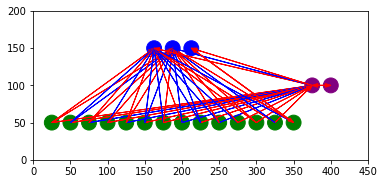

In [12]:
# Check results
for i in test_e_nc.fitness:
    print(i)
for i in test_e_nc.top:
    print(i)
for i in test_e_nc.top:
    print(test_e_nc.genome[i])
    
# this should be True
print([normalize(g) for g in test_e_nc.genome[-1]] == [normalize(g) for g in test_e_nc.trial.ann.genome])
print(test_e_nc.trial.ann.genome_size)
test_e_nc.trial.ann.show()
print([normalize(g) for g in test_e_nc.trial.ann.genome])

In [28]:
# Check whether this fitness controlled the next generation of genomes
all_data = []

data_file = 'Data/2019_04_13_no_comm_cs_conn_Run5_final.genome'
df = pd.read_csv(data_file)

df[[c for c in df.columns if 'locus' in c or 'total' in c]]

,locus_0,locus_1,locus_2,locus_3,locus_4,locus_5,locus_6,locus_7,locus_8,locus_9,...,locus_59,locus_60,locus_61,locus_62,locus_63,locus_64,locus_65,locus_66,locus_67,locus_68
0,31,178,87,209,13,144,90,174,168,6,...,94,252,0,127,142,25,38,212,3,41
1,31,178,87,209,13,144,90,174,168,6,...,94,219,0,127,142,25,38,212,3,41
2,31,178,87,209,13,144,90,174,168,6,...,94,252,0,127,142,25,38,212,3,41
3,31,178,87,209,13,144,90,174,168,6,...,94,252,0,127,142,25,38,212,3,41
4,31,178,87,209,13,144,90,174,168,6,...,94,252,0,127,142,25,38,212,3,41
5,31,178,87,209,13,144,90,174,168,6,...,94,36,0,127,142,25,38,212,103,41
6,31,178,87,209,13,144,90,174,168,6,...,94,36,0,127,142,25,38,212,103,41
7,31,178,87,209,13,144,90,174,168,6,...,94,36,0,127,142,25,38,212,103,41
8,31,178,87,209,13,144,90,174,168,6,...,94,36,0,127,142,25,38,212,103,41
9,31,178,87,209,13,144,90,174,168,6,...,94,36,0,127,142,25,38,212,103,41


In [13]:
# check comm_sensor states
# they should all be zero
print(test_e_nc.trial.comm_disabled)
print(test_e_nc.trial.env.agents[0].ann.nodes[9]['name'])
print(len(test_e_nc.trial.env.agents[0].ann.nodes[9]['activation']))

for i in [9, 10, 11, 12]:
    print(test_e_nc.trial.env.agents[0].ann.nodes[i]['activation'][:200])

True
comm_1
1001
[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

### no comm, comm self disconn

In [14]:
test_e_nc_nsc = experiment(condition='no_comm',
               comm_self_connected = False,
               run_num=5,
               first_gen = new_fg_65,
               today='2019_04_13',
               pop=10, gen=2, trial_num=3, include_top=2)
test_e_nc_nsc.run()

current generation: 1 / 2
population: 1 / 10
population: 2 / 10
population: 3 / 10
population: 4 / 10
population: 5 / 10
population: 6 / 10
population: 7 / 10
population: 8 / 10
population: 9 / 10
population: 10 / 10
current generation: 2 / 2
population: 1 / 10
population: 2 / 10
population: 3 / 10
population: 4 / 10
population: 5 / 10
population: 6 / 10
population: 7 / 10
population: 8 / 10
population: 9 / 10
population: 10 / 10


(0, 0.0, [0.0, 0.0, 0.0])
(1, 0.0, [0.0, 0.0, 0.0])
(2, 70.58333333333333, [0.0, 211.75, 0.0])
(3, 0.0, [0.0, 0.0, 0.0])
(4, 0.0, [0.0, 0.0, 0.0])
(5, 37.333333333333336, [0.0, 34.5, 77.5])
(6, 0.0, [0.0, 0.0, 0.0])
(7, 30.333333333333332, [0.0, 91.0, 0.0])
(8, 25.083333333333332, [0.0, 0.0, 75.25])
(9, 26.75, [0.0, 52.75, 27.5])
2
5
[47, 44, 254, 137, 112, 147, 101, 101, 34, 95, 76, 27, 207, 61, 157, 239, 255, 23, 162, 79, 94, 70, 81, 156, 212, 237, 87, 232, 173, 70, 3, 83, 245, 135, 25, 83, 172, 209, 162, 91, 235, 12, 188, 72, 118, 3, 46, 25, 88, 56, 50, 82, 62, 167, 7, 110, 55, 199, 166, 58, 218, 161, 67, 60, 65]
[184, 52, 222, 174, 107, 90, 203, 228, 99, 21, 45, 113, 214, 187, 14, 252, 9, 106, 251, 154, 68, 34, 169, 140, 84, 239, 214, 244, 235, 60, 65, 225, 225, 11, 74, 121, 242, 106, 92, 113, 72, 137, 253, 120, 121, 142, 78, 227, 95, 109, 57, 190, 78, 61, 91, 106, 188, 228, 116, 180, 84, 174, 85, 57, 31]
True
65
[2.215686274509804, -2.9607843137254903, 3.7058823529411775, 1.823529

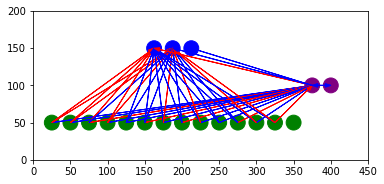

In [15]:
# Check results
for i in test_e_nc_nsc.fitness:
    print(i)
for i in test_e_nc_nsc.top:
    print(i)
for i in test_e_nc_nsc.top:
    print(test_e_nc_nsc.genome[i])
    
# this should be True
print([normalize(g) for g in test_e_nc_nsc.genome[-1]] == [normalize(g) for g in test_e_nc_nsc.trial.ann.genome])
print(test_e_nc_nsc.trial.ann.genome_size)
test_e_nc_nsc.trial.ann.show()
print([normalize(g) for g in test_e_nc_nsc.trial.ann.genome])

In [29]:
# Check whether this fitness controlled the next generation of genomes
all_data = []

data_file = 'Data/2019_04_13_no_comm_cs_disconn_Run5_final.genome'
df = pd.read_csv(data_file)

df[[c for c in df.columns if 'locus' in c or 'total' in c]]

,locus_0,locus_1,locus_2,locus_3,locus_4,locus_5,locus_6,locus_7,locus_8,locus_9,...,locus_55,locus_56,locus_57,locus_58,locus_59,locus_60,locus_61,locus_62,locus_63,locus_64
0,47,44,254,137,112,147,101,101,34,95,...,110,55,199,166,58,218,161,67,60,65
1,47,44,254,137,112,147,221,101,34,95,...,110,55,199,166,58,218,161,234,60,65
2,47,44,254,137,112,147,101,101,34,95,...,110,55,199,166,58,218,161,238,60,65
3,47,44,254,137,112,147,101,101,34,95,...,110,55,199,166,58,218,161,67,60,65
4,47,44,254,137,112,147,101,101,34,95,...,110,55,199,166,58,218,161,67,60,65
5,184,52,222,174,107,90,203,228,115,21,...,106,188,228,116,180,84,174,210,57,31
6,184,52,222,174,107,90,203,228,99,21,...,106,188,228,116,180,84,174,85,57,31
7,184,52,222,174,107,90,203,228,99,21,...,106,188,228,116,180,84,174,85,57,31
8,184,52,222,174,107,90,203,228,99,21,...,106,188,228,116,180,84,174,85,57,31
9,184,52,222,174,107,90,203,228,99,21,...,106,188,228,116,180,84,174,85,57,31


In [31]:
# Check whether this fitness controlled the next generation of genomes
all_data = []

data_file = 'Data/2019_04_13_no_comm_cs_disconn_Run5_Gen0.dat'
df = pd.read_csv(data_file)

df[[c for c in df.columns if 'locus' in c or 'total' in c]]

,locus_0,locus_1,locus_2,locus_3,locus_4,locus_5,locus_6,locus_7,locus_8,locus_9,...,locus_56,locus_57,locus_58,locus_59,locus_60,locus_61,locus_62,locus_63,locus_64,total_fit
0,31,178,87,209,13,144,90,174,168,6,...,75,87,132,94,142,25,38,212,3,0.000000
1,122,118,55,203,250,173,60,89,145,171,...,205,130,137,165,69,17,3,99,69,0.000000
2,47,44,254,137,112,147,101,101,34,95,...,55,199,166,58,218,161,67,60,65,63.583333
3,220,199,54,204,124,254,39,158,111,142,...,248,65,45,17,246,111,115,86,182,37.250000
4,229,108,100,241,92,154,211,229,211,14,...,89,170,222,216,29,210,155,120,109,42.750000
5,213,102,235,98,108,128,178,206,85,223,...,21,187,112,159,169,214,203,103,135,0.000000
6,106,32,16,166,137,2,206,255,211,113,...,153,46,252,17,125,41,247,230,20,0.000000
7,242,220,91,90,219,115,137,101,197,161,...,114,114,53,189,127,125,87,172,133,0.000000
8,184,52,222,174,107,90,203,228,99,21,...,188,228,116,180,84,154,85,57,31,48.583333
9,220,6,61,165,159,119,76,97,197,15,...,168,255,209,119,207,229,6,172,148,0.000000


In [16]:
# check comm_sensor states
# they should all be zero
print(test_e_nc_nsc.trial.comm_disabled)
print(test_e_nc_nsc.trial.env.agents[0].ann.nodes[9]['name'])
print(len(test_e_nc_nsc.trial.env.agents[0].ann.nodes[9]['activation']))

for i in [9, 10, 11, 12]:
    print(test_e_nc_nsc.trial.env.agents[0].ann.nodes[i]['activation'][:200])

True
comm_1
1001
[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

# This code can be used to read the files from an experiment into a large dataframe

### Comm, Comm_self

In [27]:
import pandas as pd

all_data = []
for i in range(test_e.gen):
    data_file = 'Data/2019_04_13_comm_cs_conn_Run5_Gen{}.dat'.format(i)
    df = pd.read_csv(data_file)
    df['gen'] = i
    all_data.append(df)

all_df = pd.concat(all_data)

In [28]:
all_df.columns

Index(['pop', 'locus_0', 'locus_1', 'locus_2', 'locus_3', 'locus_4', 'locus_5',
       'locus_6', 'locus_7', 'locus_8', 'locus_9', 'locus_10', 'locus_11',
       'locus_12', 'locus_13', 'locus_14', 'locus_15', 'locus_16', 'locus_17',
       'locus_18', 'locus_19', 'locus_20', 'locus_21', 'locus_22', 'locus_23',
       'locus_24', 'locus_25', 'locus_26', 'locus_27', 'locus_28', 'locus_29',
       'locus_30', 'locus_31', 'locus_32', 'locus_33', 'locus_34', 'locus_35',
       'locus_36', 'locus_37', 'locus_38', 'locus_39', 'locus_40', 'locus_41',
       'locus_42', 'locus_43', 'locus_44', 'locus_45', 'locus_46', 'locus_47',
       'locus_48', 'locus_49', 'locus_50', 'locus_51', 'locus_52', 'locus_53',
       'locus_54', 'locus_55', 'locus_56', 'locus_57', 'locus_58', 'locus_59',
       'locus_60', 'locus_61', 'locus_62', 'locus_63', 'locus_64', 'locus_65',
       'locus_66', 'locus_67', 'locus_68', 'total_fit', 'trial_0_fit',
       'trial_1_fit', 'trial_2_fit', 'gen'],
      dtype='objec

In [32]:
# This should be True
# The first genome in the populatoin of the first gen
print(list(all_df.iloc[0][1:70])==list(fg_69[0]))
print(list(fg_69[0]))

True
[156, 26, 129, 130, 173, 177, 68, 0, 9, 123, 190, 254, 231, 135, 204, 211, 186, 18, 255, 161, 50, 174, 241, 192, 211, 169, 64, 196, 3, 184, 140, 116, 185, 177, 134, 52, 247, 66, 60, 160, 95, 233, 179, 31, 229, 154, 9, 109, 135, 99, 155, 169, 109, 74, 81, 96, 230, 101, 40, 44, 99, 203, 56, 170, 34, 141, 30, 56, 230]


In [33]:
def get_genome(all_df, g, p):
    """Get genome for a row."""
    p = all_df[(all_df['gen']==g) & (all_df['pop']==p)]
    df = p[[c for c in p.columns if 'locus' in c or 'total' in c]]
    df_list = df.values.tolist()
    return df_list[0][:-1], df_list[0][-1:]

In [ ]:
first_gen = ()

In [35]:
genotype = get_genome(all_df, 0, 4)[0]
genotype_fit = get_genome(all_df, 0, 4)[1]

print(genotype_fit)
print(genotype)
print(fg_69[4])

[0.0]
[240.0, 246.0, 138.0, 41.0, 193.0, 160.0, 91.0, 88.0, 121.0, 233.0, 82.0, 163.0, 134.0, 95.0, 49.0, 230.0, 189.0, 1.0, 176.0, 172.0, 33.0, 65.0, 184.0, 138.0, 225.0, 252.0, 39.0, 61.0, 115.0, 218.0, 109.0, 214.0, 229.0, 143.0, 128.0, 249.0, 103.0, 239.0, 99.0, 97.0, 64.0, 165.0, 176.0, 244.0, 60.0, 178.0, 197.0, 124.0, 209.0, 200.0, 200.0, 19.0, 195.0, 79.0, 58.0, 59.0, 146.0, 160.0, 46.0, 237.0, 169.0, 89.0, 60.0, 118.0, 167.0, 23.0, 49.0, 65.0, 191.0]
[240, 246, 138, 41, 193, 160, 91, 88, 121, 233, 82, 163, 134, 95, 49, 230, 189, 1, 176, 172, 33, 65, 184, 138, 225, 252, 39, 61, 115, 218, 109, 214, 229, 143, 128, 249, 103, 239, 99, 97, 64, 165, 176, 244, 60, 178, 197, 124, 209, 200, 200, 19, 195, 79, 58, 59, 146, 160, 46, 237, 169, 89, 60, 118, 167, 23, 49, 65, 191]


In [36]:
genotype = get_genome(all_df, 0, 4)[0]

ann = MN_controller(genotype,
                    comm_self_connected=True)
test_trial = trial(ann, comm_disabled=False)

34.75
1001


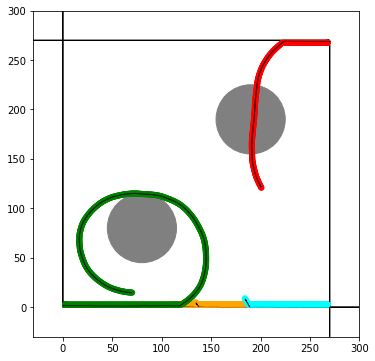

In [116]:
test_trial.run()
print(test_trial.fitness)
print(len(test_trial.env.agents[0].ann.nodes[0]['activation']))
test_trial.show()

In [ ]:
final_genome='Data/2019_04_13comm_Run5_final.genome'


In [2]:
from Environment import environment
from Agent import agent
from Controller import MN_controller
from Trial import trial
from Experiment import experiment

import random as rd
import pickle  
import math
from matplotlib import pyplot as plt
from matplotlib.patches import Circle, FancyArrow
from Helper import *
from copy import deepcopy

from tqdm import tqdm

In [3]:
e = experiment(pop=10, gen=2, trial_num=3, include_top=2)
e.run()

current generation: 0 / 2
population: 0 / 10
population: 1 / 10
population: 2 / 10
population: 3 / 10
population: 4 / 10
population: 5 / 10
population: 6 / 10
population: 7 / 10
population: 8 / 10
population: 9 / 10
current generation: 1 / 2
population: 0 / 10
population: 1 / 10
population: 2 / 10
population: 3 / 10
population: 4 / 10
population: 5 / 10
population: 6 / 10
population: 7 / 10
population: 8 / 10
population: 9 / 10


In [5]:
for k, v in e.fit_dict.items():
    print(k, v)

g0p0 [47.0, 0.0, 32.75]
g0p1 [0.0, 0.0, 0.0]
g0p2 [39.75, 78.75, 0.0]
g0p3 [23.75, 0.0, 0.0]
g0p4 [0.0, 0.0, 0.0]
g0p5 [0.0, 0.0, 264.75]
g0p6 [0.0, 238.25, 0.0]
g0p7 [0.0, 0.0, 0.0]
g0p8 [0.0, 0.0, 0.0]
g0p9 [195.25, 0.0, 93.5]
g1p0 [0.0, 0.0, 0.0]
g1p1 [0.0, 0.0, 404.25]
g1p2 [0.0, 0.0, 213.0]
g1p3 [105.0, 0.0, 188.75]
g1p4 [0.0, 195.0, 118.5]
g1p5 [27.0, 101.75, 79.25]
g1p6 [0.0, 182.25, 0.0]
g1p7 [0.0, 58.5, 0.0]
g1p8 [0.0, 0.0, 0.0]
g1p9 [0.0, 0.0, 0.0]


In [4]:
for i in e.fitness[-1]:
    print(i[0], i[1])

0 0.0
1 134.75
2 71.0
3 97.91666666666667
4 104.5
5 69.33333333333333
6 60.75
7 19.5
8 0.0
9 0.0


In [4]:
len(e.genome)

3

219.25


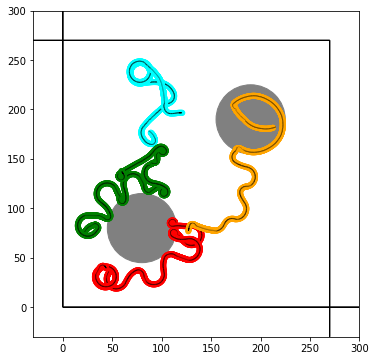

In [7]:
genome = e.genome[-2][9]
ann_controller = MN_controller(genome)
t = trial(deepcopy(ann_controller))
t.run()
print(t.fitness)
t.show()

In [11]:
t.step_fitness

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

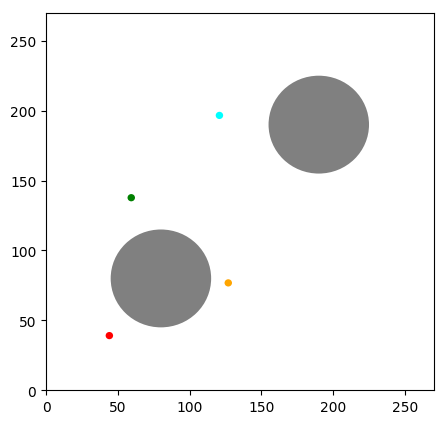

In [8]:
from Animate import animate
animate(t)

# Run Experiment

In [22]:
exp = experiment(pop=50, 
                 gen=50, 
                 genome_size=83,
                 trial_num=10,
                 iteration=1000,
                 include_top=10
                )

In [23]:
exp.run()

current generation: 0 / 50
population: 0 / 50
population: 1 / 50
population: 2 / 50
population: 3 / 50
population: 4 / 50
population: 5 / 50
population: 6 / 50
population: 7 / 50
population: 8 / 50
population: 9 / 50
population: 10 / 50
population: 11 / 50
population: 12 / 50
population: 13 / 50
population: 14 / 50
population: 15 / 50
population: 16 / 50
population: 17 / 50
population: 18 / 50
population: 19 / 50
population: 20 / 50
population: 21 / 50
population: 22 / 50
population: 23 / 50
population: 24 / 50
population: 25 / 50
population: 26 / 50
population: 27 / 50
population: 28 / 50
population: 29 / 50
population: 30 / 50
population: 31 / 50
population: 32 / 50
population: 33 / 50
population: 34 / 50
population: 35 / 50
population: 36 / 50
population: 37 / 50
population: 38 / 50
population: 39 / 50
population: 40 / 50
population: 41 / 50
population: 42 / 50
population: 43 / 50
population: 44 / 50
population: 45 / 50
population: 46 / 50
population: 47 / 50
population: 48 / 50
pop

population: 2 / 50
population: 3 / 50
population: 4 / 50
population: 5 / 50
population: 6 / 50
population: 7 / 50
population: 8 / 50
population: 9 / 50
population: 10 / 50
population: 11 / 50
population: 12 / 50
population: 13 / 50
population: 14 / 50
population: 15 / 50
population: 16 / 50
population: 17 / 50
population: 18 / 50
population: 19 / 50
population: 20 / 50
population: 21 / 50
population: 22 / 50
population: 23 / 50
population: 24 / 50
population: 25 / 50
population: 26 / 50
population: 27 / 50
population: 28 / 50
population: 29 / 50
population: 30 / 50
population: 31 / 50
population: 32 / 50
population: 33 / 50
population: 34 / 50
population: 35 / 50
population: 36 / 50
population: 37 / 50
population: 38 / 50
population: 39 / 50
population: 40 / 50
population: 41 / 50
population: 42 / 50
population: 43 / 50
population: 44 / 50
population: 45 / 50
population: 46 / 50
population: 47 / 50
population: 48 / 50
population: 49 / 50
current generation: 9 / 50
population: 0 / 50
po

population: 5 / 50
population: 6 / 50
population: 7 / 50
population: 8 / 50
population: 9 / 50
population: 10 / 50
population: 11 / 50
population: 12 / 50
population: 13 / 50
population: 14 / 50
population: 15 / 50
population: 16 / 50
population: 17 / 50
population: 18 / 50
population: 19 / 50
population: 20 / 50
population: 21 / 50
population: 22 / 50
population: 23 / 50
population: 24 / 50
population: 25 / 50
population: 26 / 50
population: 27 / 50
population: 28 / 50
population: 29 / 50
population: 30 / 50
population: 31 / 50
population: 32 / 50
population: 33 / 50
population: 34 / 50
population: 35 / 50
population: 36 / 50
population: 37 / 50
population: 38 / 50
population: 39 / 50
population: 40 / 50
population: 41 / 50
population: 42 / 50
population: 43 / 50
population: 44 / 50
population: 45 / 50
population: 46 / 50
population: 47 / 50
population: 48 / 50
population: 49 / 50
current generation: 17 / 50
population: 0 / 50
population: 1 / 50
population: 2 / 50
population: 3 / 50
p

population: 8 / 50
population: 9 / 50
population: 10 / 50
population: 11 / 50
population: 12 / 50
population: 13 / 50
population: 14 / 50
population: 15 / 50
population: 16 / 50
population: 17 / 50
population: 18 / 50
population: 19 / 50
population: 20 / 50
population: 21 / 50
population: 22 / 50
population: 23 / 50
population: 24 / 50
population: 25 / 50
population: 26 / 50
population: 27 / 50
population: 28 / 50
population: 29 / 50
population: 30 / 50
population: 31 / 50
population: 32 / 50
population: 33 / 50
population: 34 / 50
population: 35 / 50
population: 36 / 50
population: 37 / 50
population: 38 / 50
population: 39 / 50
population: 40 / 50
population: 41 / 50
population: 42 / 50
population: 43 / 50
population: 44 / 50
population: 45 / 50
population: 46 / 50
population: 47 / 50
population: 48 / 50
population: 49 / 50
current generation: 25 / 50
population: 0 / 50
population: 1 / 50
population: 2 / 50
population: 3 / 50
population: 4 / 50
population: 5 / 50
population: 6 / 50
p

population: 11 / 50
population: 12 / 50
population: 13 / 50
population: 14 / 50
population: 15 / 50
population: 16 / 50
population: 17 / 50
population: 18 / 50
population: 19 / 50
population: 20 / 50
population: 21 / 50
population: 22 / 50
population: 23 / 50
population: 24 / 50
population: 25 / 50
population: 26 / 50
population: 27 / 50
population: 28 / 50
population: 29 / 50
population: 30 / 50
population: 31 / 50
population: 32 / 50
population: 33 / 50
population: 34 / 50
population: 35 / 50
population: 36 / 50
population: 37 / 50
population: 38 / 50
population: 39 / 50
population: 40 / 50
population: 41 / 50
population: 42 / 50
population: 43 / 50
population: 44 / 50
population: 45 / 50
population: 46 / 50
population: 47 / 50
population: 48 / 50
population: 49 / 50
current generation: 33 / 50
population: 0 / 50
population: 1 / 50
population: 2 / 50
population: 3 / 50
population: 4 / 50
population: 5 / 50
population: 6 / 50
population: 7 / 50
population: 8 / 50
population: 9 / 50
po

population: 14 / 50
population: 15 / 50
population: 16 / 50
population: 17 / 50
population: 18 / 50
population: 19 / 50
population: 20 / 50
population: 21 / 50
population: 22 / 50
population: 23 / 50
population: 24 / 50
population: 25 / 50
population: 26 / 50
population: 27 / 50
population: 28 / 50
population: 29 / 50
population: 30 / 50
population: 31 / 50
population: 32 / 50
population: 33 / 50
population: 34 / 50
population: 35 / 50
population: 36 / 50
population: 37 / 50
population: 38 / 50
population: 39 / 50
population: 40 / 50
population: 41 / 50
population: 42 / 50
population: 43 / 50
population: 44 / 50
population: 45 / 50
population: 46 / 50
population: 47 / 50
population: 48 / 50
population: 49 / 50
current generation: 41 / 50
population: 0 / 50
population: 1 / 50
population: 2 / 50
population: 3 / 50
population: 4 / 50
population: 5 / 50
population: 6 / 50
population: 7 / 50
population: 8 / 50
population: 9 / 50
population: 10 / 50
population: 11 / 50
population: 12 / 50
po

population: 17 / 50
population: 18 / 50
population: 19 / 50
population: 20 / 50
population: 21 / 50
population: 22 / 50
population: 23 / 50
population: 24 / 50
population: 25 / 50
population: 26 / 50
population: 27 / 50
population: 28 / 50
population: 29 / 50
population: 30 / 50
population: 31 / 50
population: 32 / 50
population: 33 / 50
population: 34 / 50
population: 35 / 50
population: 36 / 50
population: 37 / 50
population: 38 / 50
population: 39 / 50
population: 40 / 50
population: 41 / 50
population: 42 / 50
population: 43 / 50
population: 44 / 50
population: 45 / 50
population: 46 / 50
population: 47 / 50
population: 48 / 50
population: 49 / 50
current generation: 49 / 50
population: 0 / 50
population: 1 / 50
population: 2 / 50
population: 3 / 50
population: 4 / 50
population: 5 / 50
population: 6 / 50
population: 7 / 50
population: 8 / 50
population: 9 / 50
population: 10 / 50
population: 11 / 50
population: 12 / 50
population: 13 / 50
population: 14 / 50
population: 15 / 50
po

In [24]:
for k, v in exp.fit_dict.items():
    print(k, v)

g0p0 [0.0, 0.0, 0.0, 39.5, 89.25, 19.75, 0.0, 95.5, 0.0, 40.75]
g0p1 [0.0, 0.0, 0.0, 108.75, 0.0, 69.5, 0.0, 68.0, 114.25, 0.0]
g0p2 [0.0, 10.0, 200.25, 0.0, 0.0, 0.0, 11.5, 0.0, 16.5, 0.0]
g0p3 [0.0, 0.0, 0.0, 0.0, 36.75, 0.0, 0.0, 0.0, 0.0, 0.0]
g0p4 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 58.0]
g0p5 [116.25, 21.0, 0.0, 15.25, 10.5, 72.25, 11.75, 0.0, 258.5, 0.0]
g0p6 [0.0, 55.25, 0.0, 4.75, 0.0, 0.0, 147.0, 0.0, 0.0, 0.0]
g0p7 [0.0, 0.0, 60.5, 0.0, 0.0, 68.0, 172.75, 0.0, 0.0, 0.0]
g0p8 [88.5, 107.25, 79.75, 239.0, 96.5, 88.75, 76.0, 106.0, 68.5, 27.5]
g0p9 [0.0, 0.0, 216.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 59.25]
g0p10 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
g0p11 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 38.5]
g0p12 [10.5, 147.75, 247.0, 125.0, 95.25, 75.0, 180.25, 220.75, 238.75, 116.0]
g0p13 [0.0, 0.0, 96.25, 0.0, -457.25, 0.0, 0.0, 0.0, 0.0, 0.0]
g0p14 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 21.5, 87.75, 0.0]
g0p15 [75.0, 0.0, 171.75, 5.5, 124.5, 0.0, 65.0, 0.0, 1

g11p21 [40.25, 521.5, 438.25, 97.75, 249.0, 332.75, 312.75, 400.25, 64.0, 41.0]
g11p22 [402.25, 248.75, 379.0, 164.0, 250.5, 129.5, 339.25, 260.75, 113.5, 70.25]
g11p23 [331.25, 357.25, 166.0, 211.5, 57.25, 313.25, 140.25, 76.0, 37.25, 192.75]
g11p24 [194.25, 274.0, 370.0, 223.5, -159.5, 191.75, 32.5, 203.75, 268.75, 182.75]
g11p25 [127.75, 81.5, 231.75, 199.75, 255.75, 216.0, 317.0, 543.5, 294.0, 503.0]
g11p26 [164.25, 56.5, 378.5, 249.75, 627.25, 82.75, 126.5, 227.0, 218.25, 307.5]
g11p27 [217.75, 413.25, 663.25, 386.25, 272.0, 460.5, 294.25, 136.5, 523.0, 424.75]
g11p28 [347.5, 84.25, 39.0, 390.5, 139.25, 366.25, 277.0, 44.5, 39.0, 317.5]
g11p29 [289.0, 347.5, 527.0, 74.25, 113.25, 126.75, 292.0, 288.75, 130.25, 102.25]
g11p30 [210.0, 234.0, 243.0, 468.5, 36.5, 302.75, 226.0, 225.25, 275.5, 221.75]
g11p31 [619.75, 529.75, 463.25, 236.0, 39.75, 375.25, 232.5, 164.5, 250.75, 401.75]
g11p32 [463.0, 237.75, 119.5, 397.0, 141.0, 413.75, 282.0, 298.5, 316.5, 313.0]
g11p33 [342.5, 66.0, 30

g23p47 [607.25, 333.25, 347.25, 361.25, 340.0, 108.75, 137.0, -343.5, -14.25, 428.0]
g23p48 [12.25, 0.0, 31.5, 0.0, 0.0, 0.0, 0.0, 0.0, 122.75, 0.0]
g23p49 [198.0, 0.0, 0.0, 96.75, 69.25, 322.0, 112.75, 0.0, 110.25, 0.0]
g24p0 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
g24p1 [277.25, 342.75, -63.5, 344.75, 223.25, 291.5, 351.75, 368.75, 382.25, 298.0]
g24p2 [470.0, 735.5, 331.5, 288.5, 248.0, 413.0, 345.5, 301.5, 395.0, 382.25]
g24p3 [97.0, 243.75, 583.5, 324.5, 361.75, 489.75, 36.0, 358.75, 374.25, 158.75]
g24p4 [381.75, 457.0, 215.25, 45.5, 519.25, 343.75, 329.75, 266.5, 316.25, 461.75]
g24p5 [279.25, 460.75, 469.0, 92.25, 151.25, -73.75, 226.0, 541.75, 369.75, 388.5]
g24p6 [213.5, 540.0, 402.5, 432.25, 114.75, 255.0, -684.5, 605.75, 529.0, 648.75]
g24p7 [368.0, 368.75, 420.5, 287.0, 314.0, 111.75, 305.75, 410.25, 347.25, 422.5]
g24p8 [252.5, 370.75, 92.75, 135.75, 267.0, 288.5, 352.5, 350.0, 445.0, 395.25]
g24p9 [0.0, 146.75, 57.75, 137.5, 188.75, 217.0, 30.25, 0.0, 0.0, 0.0

g36p5 [733.25, -2.0, 412.25, -271.75, 579.0, -76.5, 575.25, 265.25, 444.75, 253.75]
g36p6 [-220.5, -149.5, 205.0, 433.75, 123.5, 419.0, 564.0, 292.5, 401.5, 593.25]
g36p7 [111.5, 305.25, -181.75, 451.0, 651.75, 109.25, 136.25, -268.5, -226.25, -102.5]
g36p8 [326.5, 216.5, 260.25, 325.25, 132.25, 422.0, -80.0, 4.0, 229.5, 753.25]
g36p9 [-63.5, 157.75, 242.5, 549.0, 261.75, -72.75, 775.75, 499.25, -87.0, 736.5]
g36p10 [443.75, 641.0, 179.75, 148.0, 694.25, 7.0, 246.5, 84.5, 0.0, 130.0]
g36p11 [137.75, 650.75, 493.75, 159.75, 156.5, 54.75, 279.25, 418.75, 622.25, 619.75]
g36p12 [546.25, 545.75, 50.0, 299.0, -118.25, 147.0, 298.0, -940.5, 448.25, 706.5]
g36p13 [626.0, 23.75, 461.5, 508.75, 759.5, 661.25, 147.75, 793.0, 546.0, 514.5]
g36p14 [270.25, 443.75, 289.25, 325.5, 90.0, 323.5, 428.75, 143.5, 131.75, 409.75]
g36p15 [109.0, 126.0, 155.0, 163.5, 127.0, 134.25, 169.5, 176.75, 111.5, 126.75]
g36p16 [0.0, 29.0, 0.0, 69.75, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
g36p17 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0

364.5


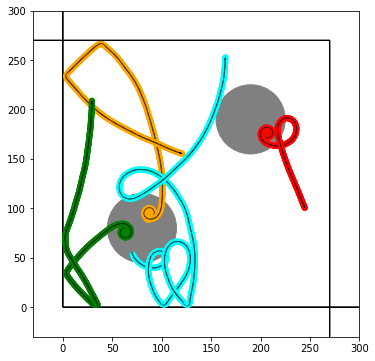

In [31]:
genome = exp.genome[-2][48]
ann_controller = MN_controller(genome)
t = trial(deepcopy(ann_controller))
t.run()
print(t.fitness)
t.show()

In [26]:
from Animate import animate

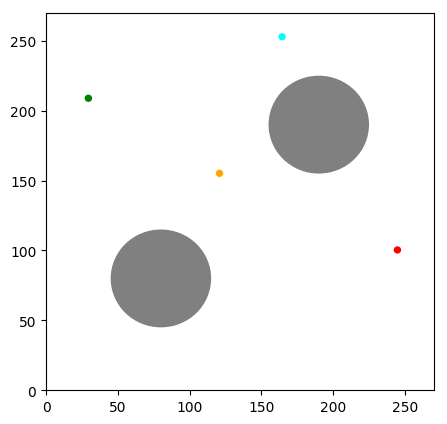

In [32]:
animate(t, 'gen50p48')

In [29]:
pickle.dump(exp, open('gen50p50t10.exp', 'wb'))
pickle.dump(exp.genome, open('gen50p50t10.genome', 'wb'))

In [3]:
ann_controller = MN_controller(e.genome[0][6])

In [4]:
ann_controller.nodes

{0: {'activation': [0],
  'name': 'IR_0',
  'time_const': 0.9333333333333333,
  'time_const_locus': 0,
  'type': 'sensory'},
 1: {'activation': [0],
  'name': 'IR_1',
  'time_const': 0.4549019607843137,
  'time_const_locus': 1,
  'type': 'sensory'},
 2: {'activation': [0],
  'name': 'IR_2',
  'time_const': 0.17254901960784313,
  'time_const_locus': 2,
  'type': 'sensory'},
 3: {'activation': [0],
  'name': 'IR_3',
  'time_const': 0.396078431372549,
  'time_const_locus': 3,
  'type': 'sensory'},
 4: {'activation': [0],
  'name': 'IR_4',
  'time_const': 0.4470588235294118,
  'time_const_locus': 4,
  'type': 'sensory'},
 5: {'activation': [0],
  'name': 'IR_5',
  'time_const': 0.18823529411764706,
  'time_const_locus': 5,
  'type': 'sensory'},
 6: {'activation': [0],
  'name': 'IR_6',
  'time_const': 0.4549019607843137,
  'time_const_locus': 6,
  'type': 'sensory'},
 7: {'activation': [0],
  'name': 'IR_7',
  'time_const': 0.8588235294117647,
  'time_const_locus': 7,
  'type': 'sensory'},

In [22]:
swirl.ann

In [3]:
swirl = pickle.load(open('g2p10t3_swirling.trial', 'rb'))

In [13]:
import pickle
from copy import deepcopy
from Trial import trial
swirl = pickle.load(open('g2p10t3_swirling.trial', 'rb'))
ann_controller = deepcopy(swirl.ann)
t = trial(ann_controller)

In [14]:
%%time
t.run(record=True, save=True)
print(t.fitness)

48.75
CPU times: user 1.1 s, sys: 12.3 ms, total: 1.11 s
Wall time: 1.14 s


In [15]:
len(t.ann.nodes[0]['activation']), len(t.env.agents[0].ann.nodes[0]['activation'])

(4001, 5001)

48.75


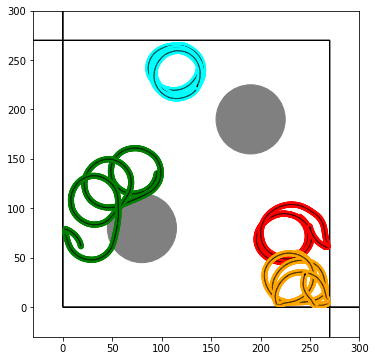

In [16]:
print(t.fitness)
t.show()

In [32]:
g2 = e.genome[0][2]

In [33]:
t.new_ann(MN_controller(g2))

In [34]:
%%time
t.run()

CPU times: user 913 ms, sys: 8.02 ms, total: 921 ms
Wall time: 957 ms


47.0


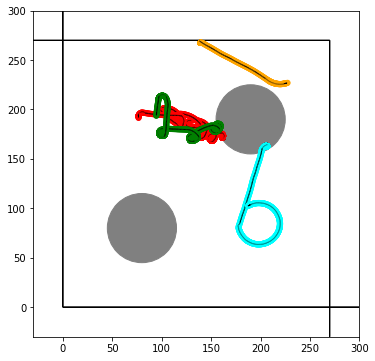

In [35]:
print(t.fitness)
t.show()

In [26]:
len(t.ann.nodes[0]['activation']), len(t.env.agents[0].ann.nodes[0]['activation'])

(1, 1001)

In [20]:
t.env.agents[0].ann.nodes[17]['activation'][200]

0.9792702144435241

In [ ]:
t.env.agents[0].ann.

In [13]:
t.env.agents[2].ann.nodes[18]['activation'][200]

0.028711363231148073

In [14]:
mydict = {'george':16,'amber':19}
print(list(mydict.keys())[list(mydict.values()).index(16)]) # Prints george

george


In [24]:
d = mydict
list(d.keys())[list(mydict.values()).index(16)]

'george'

In [43]:
d = ann_controller.connections
#list(d.keys())


l = [v['output'] for v in list(d.values())]
indices = [i for i, x in enumerate(l) if x == 16]
print(indices)
for i in indices:
    print(d[i]['input'])
    


[1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [67]:
def get_input_nodes(conn, output_node):
    index = [d['output'] for d in list(conn.values())]
    print(l)
    indices = [i for i, x in enumerate(index) if x == output_node]
    input_nodes = [conn[i]['input'] for i in indices]
    return input_nodes

In [70]:
def get_connections(conn, output_node):
    index = [d['output'] for d in list(conn.values())]
    indices = [i for i, x in enumerate(index) if x == output_node]
    return indices


In [71]:
get_connections(d, 15)

[56]

In [73]:
d[56]

{'input': 14,
 'mode': 'internal_to_internal',
 'output': 15,
 'weight': 0.45098039215686203,
 'weight_locus': 77}

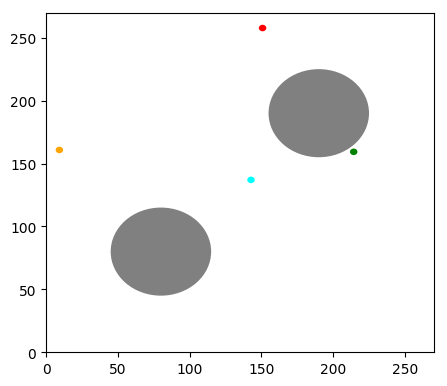

In [13]:
from Animate import animate
animate(t, name='swirl_fit_281')

In [21]:
len(t.data[0][1])

4000

In [34]:
targets = ['2', '2', '2', '1']
score = 0
if targets.count('1') > 2:
    score += 0.5
    score -= (targets.count('1') - 2)
elif targets.count('1') <= 2:
    score += targets.count('1') * 0.25

if targets.count('2') > 2:
    score += 0.5
    score -= (targets.count('2') - 2)
elif targets.count('2') <= 2:
    score += targets.count('2') * 0.25

In [37]:
l = [
    [(1, 2), (1, 3), (1, 4)],
    [(2, 2), (2, 3), (2, 4)],
    [(3, 2), (3, 3), (3, 4)],
    [(4, 2), (4, 3), (4, 4)]
]

In [39]:
l

[[(1, 2), (1, 3), (1, 4)],
 [(2, 2), (2, 3), (2, 4)],
 [(3, 2), (3, 3), (3, 4)],
 [(4, 2), (4, 3), (4, 4)]]

In [54]:
l[0][0], l[1][0], l[2][0], l[3][0]

((1, 3), (2, 3), (3, 3), (4, 3))

In [63]:
for i in range(len(l[0])):
    for j in range(len(l)):
        print(l[j][i])

(1, 2)
(2, 2)
(3, 2)
(4, 2)
(1, 3)
(2, 3)
(3, 3)
(4, 3)
(1, 4)
(2, 4)
(3, 4)
(4, 4)


In [72]:
[[l[i][j] for i in range(len(l))] for j in range(len(l[0]))]

[[(1, 2), (2, 2), (3, 2), (4, 2)],
 [(1, 3), (2, 3), (3, 3), (4, 3)],
 [(1, 4), (2, 4), (3, 4), (4, 4)]]

In [35]:
score

-0.25

In [7]:
ann_controller.nodes

{0: {'activation': [0],
  'name': 'IR_0',
  'time_const': 0.9529411764705882,
  'time_const_locus': 0,
  'type': 'sensory'},
 1: {'activation': [0],
  'name': 'IR_1',
  'time_const': 0.7372549019607844,
  'time_const_locus': 1,
  'type': 'sensory'},
 2: {'activation': [0],
  'name': 'IR_2',
  'time_const': 0.9176470588235294,
  'time_const_locus': 2,
  'type': 'sensory'},
 3: {'activation': [0],
  'name': 'IR_3',
  'time_const': 0.2,
  'time_const_locus': 3,
  'type': 'sensory'},
 4: {'activation': [0],
  'name': 'IR_4',
  'time_const': 0.792156862745098,
  'time_const_locus': 4,
  'type': 'sensory'},
 5: {'activation': [0],
  'name': 'IR_5',
  'time_const': 0.41568627450980394,
  'time_const_locus': 5,
  'type': 'sensory'},
 6: {'activation': [0],
  'name': 'IR_6',
  'time_const': 0.3568627450980392,
  'time_const_locus': 6,
  'type': 'sensory'},
 7: {'activation': [0],
  'name': 'IR_7',
  'time_const': 0.21568627450980393,
  'time_const_locus': 7,
  'type': 'sensory'},
 8: {'activati

In [8]:
t = trial(ann2)

In [9]:
%%time
t.run()

CPU times: user 744 ms, sys: 9.37 ms, total: 753 ms
Wall time: 780 ms


CPU times: user 3.59 s, sys: 89.5 ms, total: 3.68 s
Wall time: 3.87 s


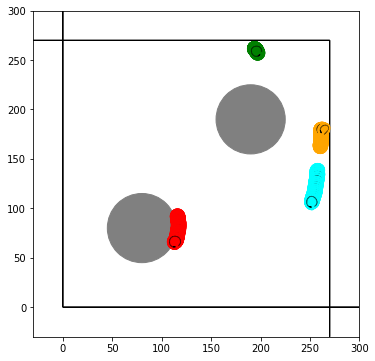

In [5]:
%%time
t.show()

In [4]:
gen_fit = e.run()

  0%|          | 0/10 [00:00<?, ?it/s]

Current generation: 0


  0%|          | 0/10 [00:00<?, ?it/s]

Current generation: 1


100%|██████████| 10/10 [02:57<00:00, 17.75s/it]


In [6]:
len(e.top)

2

In [8]:
len(e.top[1])

2

In [10]:
len(e.top[0])

2

In [23]:
genome = e.top[1][0]

In [3]:
ann = MN_controller(genome)
t = trial(ann)

NameError: name 'genome' is not defined

In [29]:
t.run()

In [33]:
t.step_fitness

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,

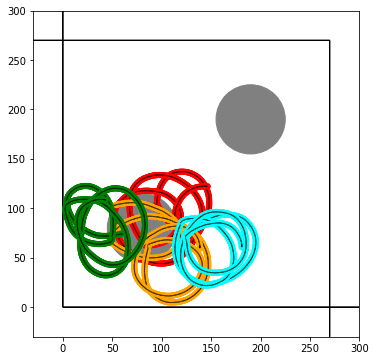

In [31]:
t.show()

In [36]:
pickle.dump(t, open('g2p10t3_swirling.trial', 'wb'))

[20,
 148,
 62,
 14,
 51,
 24,
 74,
 140,
 19,
 10,
 203,
 69,
 196,
 205,
 117,
 7,
 42,
 219,
 155,
 198,
 46,
 185,
 7,
 91,
 122,
 100,
 105,
 74,
 227,
 30,
 84,
 35,
 209,
 188,
 8,
 51,
 120,
 42,
 3,
 253,
 65,
 47,
 160,
 108,
 143,
 248,
 138,
 100,
 74,
 214,
 135,
 33,
 137,
 21,
 112,
 78,
 172,
 102,
 251,
 6,
 80,
 133,
 80,
 19,
 224,
 176,
 154,
 39,
 1,
 105,
 178,
 182,
 102,
 70,
 118,
 51,
 212,
 139,
 208,
 150,
 27,
 103,
 42]

In [27]:
import pickle  
file_fit = open('g0p60.fitness', 'wb') 
pickle.dump(gen_fit, file_fit)

In [4]:
gf_file = open('g0p601.fitness', 'rb')
gf = pickle.load(open('g0p60.fitness', 'rb'))

In [4]:
gf

[[[239,
   231,
   83,
   151,
   138,
   110,
   74,
   173,
   94,
   237,
   54,
   236,
   4,
   186,
   43,
   113,
   81,
   63,
   88,
   109,
   110,
   206,
   101,
   2,
   23,
   224,
   208,
   172,
   165,
   254,
   231,
   3,
   153,
   9,
   186,
   170,
   50,
   101,
   99,
   133,
   163,
   227,
   160,
   100,
   214,
   210,
   66,
   254,
   83,
   223,
   152,
   206,
   177,
   50,
   118,
   67,
   35,
   149,
   210,
   137,
   21,
   196,
   100,
   109,
   45,
   104,
   43,
   76,
   77,
   121,
   14,
   113,
   252,
   61,
   205,
   230,
   250,
   223,
   122,
   163,
   227,
   156,
   154],
  31.425],
 [[14,
   239,
   104,
   163,
   203,
   117,
   132,
   45,
   116,
   228,
   18,
   115,
   68,
   127,
   182,
   67,
   46,
   7,
   8,
   45,
   32,
   28,
   82,
   39,
   73,
   118,
   87,
   41,
   167,
   20,
   173,
   13,
   15,
   146,
   137,
   63,
   206,
   12,
   13,
   165,
   138,
   111,
   122,
   92,
   120,
   21,
   238,
   11

In [6]:
[g[1] for g in gf]
gen_fit = gf

In [7]:
top_genome = e.select_top(gen_fit, top=12)

In [12]:
print(top_genome)

[[175, 109, 167, 245, 140, 3, 164, 1, 60, 202, 192, 22, 223, 229, 28, 21, 183, 170, 230, 120, 2, 244, 156, 182, 218, 142, 122, 191, 195, 191, 39, 147, 99, 50, 209, 112, 242, 171, 175, 58, 223, 102, 244, 213, 150, 155, 210, 202, 47, 173, 22, 103, 191, 251, 136, 49, 252, 38, 45, 1, 176, 124, 244, 186, 105, 63, 198, 223, 214, 171, 164, 222, 113, 95, 57, 43, 91, 49, 150, 187, 167, 193, 230], [191, 200, 177, 175, 228, 224, 169, 95, 88, 44, 32, 119, 212, 37, 170, 4, 98, 54, 201, 67, 124, 116, 11, 176, 249, 171, 90, 121, 68, 226, 40, 71, 197, 114, 107, 160, 179, 212, 172, 127, 2, 182, 129, 30, 178, 12, 227, 42, 192, 222, 219, 51, 56, 113, 77, 146, 43, 54, 64, 58, 131, 232, 35, 46, 237, 197, 31, 249, 103, 224, 138, 223, 105, 178, 137, 219, 124, 47, 73, 203, 190, 81, 175], [231, 163, 31, 125, 0, 95, 40, 102, 208, 87, 218, 116, 173, 2, 78, 110, 93, 51, 153, 165, 117, 38, 162, 78, 176, 128, 51, 25, 48, 5, 204, 178, 81, 183, 149, 174, 124, 38, 248, 170, 121, 118, 183, 22, 5, 175, 0, 154, 150, 243,

In [8]:
next_gen = e.get_new_population(top_genome)

In [46]:
for i in range(len(next_gen)):
    if next_gen[29][i] != top_genome[5][i]:
        print(i)

39
48


In [10]:
len(next_gen)

60

In [23]:
index = [
    [1, 845],
    [2, 934],
    [3, 943],
    [4, 111],
    [5, 342],
    [6, 612],
    [7, 142],
    [8, 513]
]
def get_key(item):
    return item[1]

top_genome = [g[0] for g in sorted(index, key=get_key, reverse=True)[:5]]
top_genome

[3, 2, 1, 6, 8]

In [41]:
g = 2
p = 1
t = 3
'se'+'g{}p{}i{}'.format(g,p,i)

'seg2p1i3'

In [13]:
i = 1.00
i == int(i)

True

In [39]:
e = experiment(pop=100, gen=10)

In [40]:
e.run()

  0%|          | 0/100 [00:00<?, ?it/s]

Current generation: 0


  0%|          | 0/100 [00:00<?, ?it/s]

Current generation: 1


  0%|          | 0/100 [00:00<?, ?it/s]

Current generation: 2


  0%|          | 0/100 [00:00<?, ?it/s]

Current generation: 3


  0%|          | 0/100 [00:00<?, ?it/s]

Current generation: 4


  0%|          | 0/100 [00:00<?, ?it/s]

Current generation: 5


  0%|          | 0/100 [00:00<?, ?it/s]

Current generation: 6


  0%|          | 0/100 [00:00<?, ?it/s]

Current generation: 7


  0%|          | 0/100 [00:00<?, ?it/s]

Current generation: 8


  0%|          | 0/100 [00:00<?, ?it/s]

Current generation: 9


100%|██████████| 100/100 [26:29<00:00, 15.89s/it]


In [49]:
pickle.dump(e, open('g10p100.exp', 'wb') )

In [1]:
import pickle
ex = pickle.load(open('g10p100.exp', 'rb'))

In [53]:
[rd.uniform(0, 1) for i in range(10)]

[0.46719942849150387,
 0.2196707885420388,
 0.2901412246469952,
 0.9693245172372327,
 0.08150790948393505,
 0.8681583835024198,
 0.011505061180118403,
 0.5693505679976616,
 0.568880114254511,
 0.7284948544376102]

In [37]:
sample_genome = ex.genome[10][48]

In [38]:
ann = MN_controller(sample_genome)
sample_t = trial(ann)

In [39]:
sample_t.run()

In [40]:
sample_t.fitness

181.25

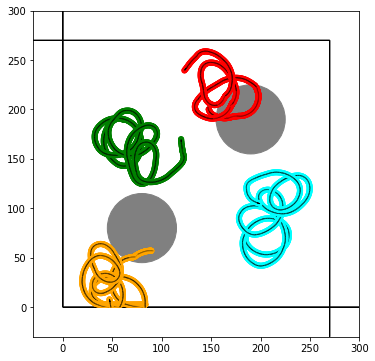

In [41]:
sample_t.show()

In [42]:
from Animate import animate

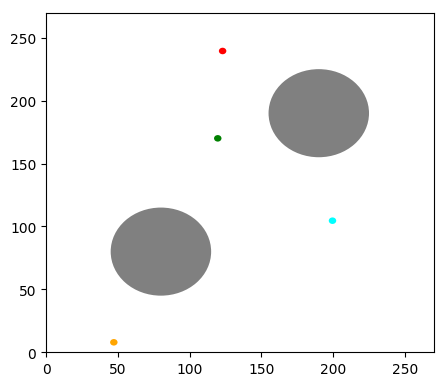

In [43]:
animate(sample_t, 'sample_trial_fit319.75')

# MN controller

The network structure specified in Marocco & Nolfi (2007)



In [44]:
from Controller import MN_controller

### Initialize Network

In [50]:
import random as rd
from Helper import normalize

genome_size = 83
genome = rd.choices(range(0, 255), k=genome_size)

ann = MN_controller(genome)

In [51]:
print('genome:', genome)

print('nodes:')
for k, v in ann.nodes.items():
    print(k, v)
    
print('connections:')
for k, v in ann.connections.items():
    print(k, v)

genome: [181, 154, 115, 44, 35, 173, 98, 125, 56, 154, 188, 22, 10, 174, 241, 239, 50, 127, 39, 204, 64, 182, 219, 17, 101, 198, 27, 44, 57, 252, 3, 163, 163, 202, 191, 172, 104, 89, 64, 113, 189, 157, 31, 251, 228, 77, 75, 0, 52, 221, 159, 122, 40, 96, 164, 181, 41, 18, 141, 204, 188, 156, 59, 32, 135, 106, 185, 119, 92, 88, 218, 15, 0, 3, 211, 238, 52, 210, 41, 71, 138, 75, 153]
nodes:
0 {'type': 'sensory', 'name': 'IR_0', 'time_const_locus': 0, 'activation': [0], 'time_const': 0.7098039215686275}
1 {'type': 'sensory', 'name': 'IR_1', 'time_const_locus': 1, 'activation': [0], 'time_const': 0.6039215686274509}
2 {'type': 'sensory', 'name': 'IR_2', 'time_const_locus': 2, 'activation': [0], 'time_const': 0.45098039215686275}
3 {'type': 'sensory', 'name': 'IR_3', 'time_const_locus': 3, 'activation': [0], 'time_const': 0.17254901960784313}
4 {'type': 'sensory', 'name': 'IR_4', 'time_const_locus': 4, 'activation': [0], 'time_const': 0.13725490196078433}
5 {'type': 'sensory', 'name': 'IR_5'

### Propogate

In [62]:
inputs = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
outputs = ann.sensor_to_motor(inputs)

for k, v in ann.nodes.items():
    print(k, v['activation'][-5:])  # last 5 digits
    
print(outputs)

14
lengths as predicted
0 [0.9092244767320378, 0.9355671776019562, 0.9542653299841336, 0.9675373518710909, 0.9769578850535978]
1 [0.970700258901112, 0.9823052543951813, 0.9893137614778742, 0.9935463500689907, 0.9961025016102925]
2 [0.9962059450249094, 0.998288955599469, 0.9992283525252508, 0.9996520021192308, 0.9998430597792609]
3 [0.9999954460582378, 0.9999992142218135, 0.9999998644147442, 0.999999976604897, 0.9999999959631979]
4 [0.9999990823120113, 0.9999998740428251, 0.9999999827117604, 0.9999999976271045, 0.9999999996743085]
5 [0.9338482315357133, 0.955120564924229, 0.9695523832623201, 0.9793433815858094, 0.9859859020170393]
6 [0.9987617701572076, 0.9995241312761034, 0.9998171171178751, 0.9999297155982423, 0.9999729887397166]
7 [0.9931987486045788, 0.9966660532375387, 0.9983657123713424, 0.9991988786134031, 0.9996072934379426]
8 [0.9999753660006286, 0.9999945901805303, 0.9999988119612144, 0.9999997390973647, 0.9999999427037349]
9 [0.970700258901112, 0.9823052543951813, 0.989313761

In [13]:
for k, v in ann.nodes.items():
    print(k, v['activation'])

0 [0, 0.36078431372549025]
1 [0, 0.40784313725490196]
2 [0, 0.9529411764705882]
3 [0, 0.43529411764705883]
4 [0, 0.8627450980392157]
5 [0, 0.9529411764705882]
6 [0, 0.39607843137254906]
7 [0, 0.9450980392156862]
8 [0, 0.2823529411764706]
9 [0, 0.8705882352941177]
10 [0, 0.7372549019607844]
11 [0, 0.6431372549019607]
12 [0, 0.6784313725490196]
13 [0, 0.0]
14 [0, 0, 7.556081505273872e-07]
15 [0, 0, 0.10883998994309205]
16 [0, 0, 0.00012693567005886528]
17 [0, 0, 0.004075283893085389]
18 [0, 0, 0.9918218509866622]


In [55]:
sensors = [
    0.7,
    0.5,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0.5,
    0,
    0,
    0,
    0
]
for n in nodes.keys():
    if n <= 12:
        nodes[n]['activation'].append(sensors[n])
    else:
        nodes[n]['activation'].append(0)


In [61]:
for k, v in nodes.items():
    print(k, v)
for k, v in connections.items():
    print(k, v)

0 {'type': 'sensory', 'name': 'IR_0', 'time_const_locus': 0, 'activation': [0.7], 'time_const': 0.803921568627451}
1 {'type': 'sensory', 'name': 'IR_1', 'time_const_locus': 1, 'activation': [0.5], 'time_const': 0.8666666666666667}
2 {'type': 'sensory', 'name': 'IR_2', 'time_const_locus': 2, 'activation': [0], 'time_const': 0.7254901960784313}
3 {'type': 'sensory', 'name': 'IR_3', 'time_const_locus': 3, 'activation': [0], 'time_const': 0.40784313725490196}
4 {'type': 'sensory', 'name': 'IR_4', 'time_const_locus': 4, 'activation': [0], 'time_const': 0.6627450980392157}
5 {'type': 'sensory', 'name': 'IR_5', 'time_const_locus': 5, 'activation': [0], 'time_const': 0.43529411764705883}
6 {'type': 'sensory', 'name': 'IR_6', 'time_const_locus': 6, 'activation': [0], 'time_const': 0.5137254901960784}
7 {'type': 'sensory', 'name': 'IR_7', 'time_const_locus': 7, 'activation': [0], 'time_const': 0.4235294117647059}
8 {'type': 'sensory', 'name': 'comm_0', 'time_const_locus': 8, 'activation': [0], '

order of computation:


sensor(t), i_1(t) -> motor (t+1)  
- sensor to motor
- internal to motor

sensor(t), i_2(t) -> i_1 (t+1)  
- sensor to internal
- internal to internal

i_1 (t) -> i_2 (t+1)  
- interal to internal

comm motor (t) -> comm self (t+1)
- motor to sensor

In [1]:
from Controller import MN_controller

In [2]:
import random as rd
genome_size = 83
genome = rd.choices(range(0, 255), k=genome_size)

In [3]:
ann = MN_controller(genome)

In [15]:
print(ann.genome)

[178, 199, 134, 51, 181, 13, 170, 154, 74, 24, 29, 33, 63, 17, 60, 61, 150, 62, 93, 19, 223, 124, 154, 221, 215, 207, 182, 158, 215, 173, 85, 7, 153, 152, 108, 88, 211, 8, 151, 176, 63, 138, 169, 143, 70, 209, 142, 137, 227, 236, 61, 4, 200, 107, 115, 202, 133, 118, 194, 3, 189, 236, 219, 41, 215, 124, 217, 77, 93, 50, 38, 21, 218, 167, 155, 169, 195, 48, 183, 111, 13, 141, 17]


In [34]:
inputs = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
ann.sensor_to_motor(inputs)

14
lengths as predicted


(0.9049148091662632, 0.7800127105992181, 0.9705599979992522)

In [54]:
import pickle  
file_t = open('RandomNetwork_Gen0.trial', 'wb') 
pickle.dump(t, file_t)

In [55]:
file_n = open('RandomNetwork_Gen0.trial', 'wb')
pickle.dump(ann, file_n)

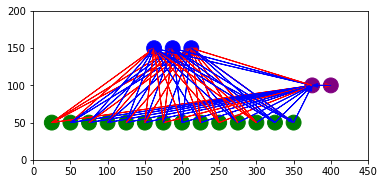

In [8]:
ann.show()

In [52]:
t.data[0][3][520:]


[[0.6249845133701865, 0.0002208131057028072, 0.9924180496519758],
 [0.6270024850903021, 0.0002162065220828293, 0.9924732656073422],
 [0.6271820975062884, 0.00021579981512862296, 0.9924781801797543],
 [0.6271979880467394, 0.0002157638601775789, 0.9924786150090227],
 [0.6271993932526291, 0.00021576068088523666, 0.9924786534616388],
 [0.6519973829452111, 0.00013048686435656137, 0.9942201554298252],
 [0.6522150086250281, 0.0001298825146685072, 0.9942382640954013],
 [0.6522170197045276, 0.00012987753081853797, 0.9942384318191949],
 [0.6529925810409958, 0.00012945821276030112, 0.9942571421709032],
 [0.6529888933575764, 0.00012947235855460324, 0.9942567032164903],
 [0.6529888497798657, 0.00012947244854736646, 0.9942567004144744],
 [0.6529888494935848, 0.00012947244907694522, 0.9942567003962156],
 [0.6529888494916927, 0.00012947244908052203, 0.994256700396071],
 [0.6529888494916781, 0.00012947244908055098, 0.9942567003960697],
 [0.6529888494916779, 0.00012947244908055098, 0.9942567003960697],


In [38]:
ann.nodes[14]['activation'], ann.nodes[15]['activation']

([0,
  0,
  2.2834427136193645e-05,
  2.0473043096771572e-05,
  1.7984275663552754e-05,
  1.579796078385478e-05,
  1.3878415462263825e-05,
  1.2192262228673237e-05,
  1.0710067117390844e-05,
  9.408059263795155e-06,
  8.264442187610329e-06,
  7.259980949830549e-06,
  6.377395447397486e-06,
  5.6021043587079595e-06,
  4.92112004493342e-06,
  4.3230130271284795e-06,
  3.7974705437920843e-06,
  3.3358173535228235e-06,
  2.9303312135136897e-06,
  2.574219244866007e-06,
  2.261275184573462e-06,
  1.9863751467533896e-06,
  1.7449353152977707e-06,
  1.5329229576156667e-06],
 [0,
  0,
  0.21294230530905406,
  0.3774510333221559,
  0.5045420527598913,
  0.6027260561200145,
  0.6785779773021234,
  0.7371772744836594,
  0.7824480775752847,
  0.8174219688297966,
  0.8444409937709396,
  0.8653144970294662,
  0.8814402857237514,
  0.8938982341011681,
  0.9035225977237006,
  0.9109578797037812,
  0.9167019901094559,
  0.9211395887135957,
  0.9245678439102953,
  0.9272163327297265,
  0.929262414574731

In [44]:
iw = [(ann.connections[c]['input'], ann.connections[c]['weight']) 
      for c in ann.connections.keys() if ann.connections[c]['output'] == 18]
a = [ann.nodes[i]['activation'][-1] for i, w in iw]

In [53]:
s = 0
for i in range(len(iw)):
    #print(iw[i][0], 'node')
    #print(iw[i][1], 'weight')
    #print(a[i], 'activation')
    print(iw[i][1] * a[i], 'sum')
    s += iw[i][1] * a[i]

-3.7450979968821296 sum
0.25450834869605465 sum
2.00113805442986 sum
2.6470588232327814 sum
3.3519799612111925 sum
-2.5294115739782086 sum
-2.725487910987107 sum
1.6273852459140206 sum
1.823529411758102 sum
4.68627279704 sum
-4.6470588235273445 sum
-3.8614907330019665 sum
2.882347562443624 sum
-0.3681975929329707 sum
3.576820234436555e-06 sum


1.3974791502361426

In [35]:
ann.nodes[16], ann.nodes[17], ann.nodes[18]

({'activation': [0,
   0,
   0.13835877392340734,
   0.2642613356547201,
   0.9989521887410415,
   0.9998199251311743,
   0.867128213591757,
   0.7693515683836163,
   0.9998571266313107,
   0.9999717931409895,
   0.9521086985005479,
   0.8642207231272246,
   0.9999295375664852,
   0.9999829883337567,
   0.9659317915211539,
   0.8908280147456477,
   0.9999456043048922,
   0.9999857767653926,
   0.9703624393088855,
   0.9007839281598474,
   0.9999509866751071,
   0.9999867820707605,
   0.9721318150287332,
   0.9049148091662632],
  'bias': -2.411764705882353,
  'bias_locus': 18,
  'name': 'motor_left',
  'type': 'motor'},
 {'activation': [0,
   0,
   0.4639993529111376,
   0.4701065802961628,
   0.9982131109633027,
   0.9994300708653885,
   0.7521384493401223,
   0.590517358994963,
   0.9992663068384069,
   0.9998259115776924,
   0.8673075237992354,
   0.7004064588483824,
   0.9996017026450926,
   0.9998906600467643,
   0.9021981310377813,
   0.7506932753680423,
   0.9996934800356091,
   

In [8]:
ann.nodes

{0: {'activation': [0,
   0.5607843137254902,
   0.8070895809304114,
   0.9152707178988473],
  'name': 'IR_0',
  'time_const': 0.4392156862745098,
  'time_const_locus': 0,
  'type': 'sensory'},
 1: {'activation': [0,
   0.5333333333333333,
   0.7822222222222222,
   0.8983703703703703],
  'name': 'IR_1',
  'time_const': 0.4666666666666667,
  'time_const_locus': 1,
  'type': 'sensory'},
 2: {'activation': [0,
   0.6196078431372549,
   0.8553018069973087,
   0.9449579422695644],
  'name': 'IR_2',
  'time_const': 0.3803921568627451,
  'time_const_locus': 2,
  'type': 'sensory'},
 3: {'activation': [0,
   0.5607843137254902,
   0.8070895809304114,
   0.9152707178988473],
  'name': 'IR_3',
  'time_const': 0.4392156862745098,
  'time_const_locus': 3,
  'type': 'sensory'},
 4: {'activation': [0,
   0.1568627450980392,
   0.289119569396386,
   0.40063022517734503],
  'name': 'IR_4',
  'time_const': 0.8431372549019608,
  'time_const_locus': 4,
  'type': 'sensory'},
 5: {'activation': [0,
   0.32

In [ ]:
class controller():
    """Generate a MN controller."""
    def __init__():
        pass
    
    def 
    
    def generate_node_list(i=14, h=2, o=3):
    """Generate list of nodes for MN controller."""
        node_count = i + h + o

        nodes = {}
        for n in range(i):
            if n <= 7:
                name = 'IR_' + str(n)
            elif n > 7 and n <= 11:
                name = 'comm_' + str(n-8)
            elif n == 12:
                name = 'ground'
            elif n == 13:
                name = 'comm_self'
            else:
                print('Error: unknown sensory neuron identity.')
            nodes[n] = {'type':'sensory', 'name': name, 'time_const_locus': n}


        for n in range(h):
            name = 'internal_' + str(n+1)
            nodes[n+i] = {'type':'internal', 'name': name, 'time_const_locus': n+i, 'bias_locus': n+i+h}

        for n in range(o):
            if n == 0:
                name = 'motor_left'
            elif n == 1:
                name = 'motor_right'
            elif n == 2:
                name = 'comm_unit'
            else:
                print('Error: unknown motor neuron identity.')
            nodes[n+i+h] = {'type':'motor', 'name': name, 'bias_locus': n+i+h*2}

        return nodes

    def generate_connection_list(i=14, h=2, o=3):
        """Generate list of all possible connections for MN controller."""
        offset = i+h*2+o

        connections = {}
        n = 0

        for i in nodes.keys():
            # sensory nodes
            if nodes[i]['type'] == 'sensory':
                for j in nodes.keys():
                    # sensor to internal
                    if nodes[j]['name'] == 'internal_1':
                        connections[n] = {'input': i, 'output': j, 'mode': 'sensor_to_internal', 'weight_locus': n+offset}
                        n += 1
                    # sensor to motor
                    if nodes[j]['type'] == 'motor':
                        connections[n] = {'input': i, 'output': j, 'mode': 'sensor_to_motor', 'weight_locus': n+offset}
                        n += 1

            # internal node 1
            if nodes[i]['name'] == 'internal_1':
                for j in nodes.keys():
                    # sensor to internal
                    if nodes[j]['name'] == 'internal_2':
                        connections[n] = {'input': i, 'output': j, 'mode': 'internal_to_internal', 'weight_locus': n+offset}
                        n += 1
                    # sensor to motor
                    if nodes[j]['type'] == 'motor':
                        connections[n] = {'input': i, 'output': j, 'mode': 'internal_to_motor', 'weight_locus': n+offset}
                        n += 1

            # internal node 2
            if nodes[i]['name'] == 'internal_2':
                for j in nodes.keys():
                    # sensor to internal
                    if nodes[j]['name'] == 'internal_1':
                        connections[n] = {'input': i, 'output': j, 'mode': 'internal_to_internal', 'weight_locus': n+offset}
                        n += 1
                        
            # comm unit to comm_self
            if nodes[i]['name'] == 'comm_unit':
                for j in nodes.keys():
                    if nodes[j]['name'] == 'comm_self':
                        connections[n] = {'input': i, 'output': j, 'mode': 'motor_to_sensor', 'weight_locus': n+offset}
                        n += 1
                        
        return connections


In [62]:
# initialize network parameters
class controller():
    """Generate a MN controller."""
    def __init__():
        """Initialize all the data needed for the network computation."""
        sensory_nodes = [
            ()
        ]
    


    
class MN_controller():
    """Generate a controller as described in Maracco & Nolfi (2003)."""
    def __init__(self, genome=[], random=False, genome_size=70):
        """
        Initialize network from genome.
        
        Two possible versions based on genome size:
        genome_size = 70:
        genome_size = 84: 
        
        Genome composition:
        0-13: input time constant 
        14-15:
        16-17:
        18-19:
        20:
        """
        
        # if want to generate random genome:
        if random:
            genome = rd.choices(range(0, 255), k=70)
        
        self.genome = genome  # this should be a list of 70 integers within range(0, 255)
        if len(genome) != 
        
        
        
        
        
        
        
        
    def randomize_genome(self):
        self.genome = rd.choices(range(0, 255), k=49)
        
        
        
    

input_tc = []
for i in range(14):
    tc = scale(rd.choice(range(0, 255)), out_min=0, out_max=1)
    input_tc.append(tc)

internal_tc = [
    scale(rd.choice(range(0, 255)), out_min=0, out_max=1),
    scale(rd.choice(range(0, 255)), out_min=0, out_max=1),
]

internal_bias = [
    scale(rd.choice(range(0, 255))),
    scale(rd.choice(range(0, 255))),
]

motor_bias = [
    scale(rd.choice(range(0, 255))),
    scale(rd.choice(range(0, 255))),
]

comm_bias = scale(rd.choice(range(0, 255)))

input_to_motor_weights = []
for i in len(motor_bias):
    




In [ ]:
# initialize activations
IR = [0, 0, 0, 0, 0, 0, 0, 0]
ground = [0]
comm = [0, 0, 0, 0]

comm_self = 0

i_1 = 0
i_2 = 0

motor = [0, 0]
comm_unit = 0

In [ ]:
# initialize data 
input_sensors = []
input_comm_self = []

internal_1 = []
internal_2 = []

output_motor = []
output_comm = []

In [ ]:
iteration = 10

# initialize
input_sensors.append(IR + ground + comm)
input_comm.append(comm_self)

internal_1.append(i_1)
internal_2.append(i_2)

output_motor.append(motor)
output_comm.append(comm_unit)

for t in range(1, iteration+1):  # output numbers: 1 ~ #iteration
    IR = [rd.uniform(0, 1),
          rd.uniform(0, 1),
          rd.uniform(0, 1),
          rd.uniform(0, 1),
          rd.uniform(0, 1),
          rd.uniform(0, 1),
          rd.uniform(0, 1),
          rd.uniform(0, 1)
         ]
    ground = [rd.uniform(0, 1)]
    comm = [rd.uniform(0, 1),
            rd.uniform(0, 1),
            rd.uniform(0, 1),
            rd.uniform(0, 1)
           ]

    print('t:', t+1)
    
    # update inputs
    inputs.append(IR + ground + comm)
    
    # update comm_self
    comm_activation = input_comm_self[t-1] * comm_tc * 
    
    
    comm_output = 
    input_comm = output_comm[t-1]
    
    # update internal neurons
    for 
    
    i_1 = 

    # update motor

    
    # update comm unit
    
    
    
    
    
    
    
    
    

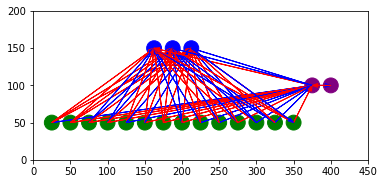

In [13]:
ann.show()

In [ ]:
class MnN_controller():
    class node()
    

# Animate Trial

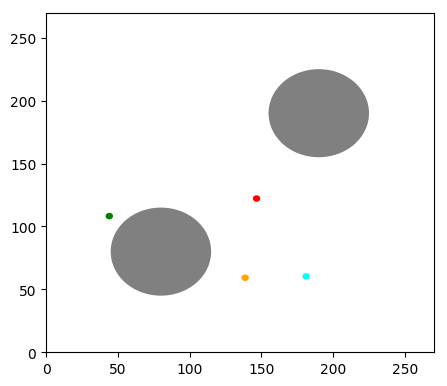

In [34]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(5, 4.5)

ax = plt.axes(xlim=(0, 270), ylim=(0, 270))
agents = t.env.agents

target1 = plt.Circle((80, 80), 35, fc='gray')
target2 = plt.Circle((190, 190), 35, fc='gray')
a0 = plt.Circle(agents[0].loc_data[0], 2.6, fc='red')
a1 = plt.Circle(agents[1].loc_data[0], 2.6, fc='orange')
a2 = plt.Circle(agents[2].loc_data[0], 2.6, fc='cyan')
a3 = plt.Circle(agents[3].loc_data[0], 2.6, fc='green')

def init():
    a0.center = agents[0].loc_data[0]
    a1.center = agents[1].loc_data[0]
    a2.center = agents[2].loc_data[0]
    a3.center = agents[3].loc_data[0]
    
    ax.add_patch(target1)
    ax.add_patch(target2)
    ax.add_patch(a0)
    ax.add_patch(a1)
    ax.add_patch(a2)
    ax.add_patch(a3)
    
    return []


def animationManage(i, a0, a1, a2, a3):
    animate0(i, a0)
    animate1(i, a1)
    animate2(i, a2)
    animate3(i, a3)
    
    return []


def animate0(i, patch):
    patch.center = agents[0].loc_data[i]
    return patch,

def animate1(i, patch):
    patch.center = agents[1].loc_data[i]
    return patch,

def animate2(i, patch):
    patch.center = agents[2].loc_data[i]
    return patch,

def animate3(i, patch):
    patch.center = agents[3].loc_data[i]
    return patch,


anim = animation.FuncAnimation(fig, animationManage,
                               init_func=init,
                               frames=1000,
                               fargs=(a0, a1, a2, a3, ),
                               interval=20,
                               blit=True,
                               repeat=True)


plt.show()
anim.save('trial_1000.mp4', fps=100, extra_args=['-vcodec', 'libx264'])


In [24]:
iteration = 200

# initialize agent locations and ang

env.agents=[agent(name='robot0'), agent(name='robot1'), agent(name='robot2'), agent(name='robot3')]
env.show(verbose=True)

for agent in env.agents:
    agent.

for i in range(iteration):
    for agent in env.agents:
        pass
        

TypeError: 'agent' object is not callable

In [20]:
rob1 = agent(name='robot1')


agent loc and orientation - sensor readings:
- IR sensor  

    input:
    - agent location and orientation
    - environment (height & width)
    - location and r of other agents
    
    for each IR sensor:
    1. get IR loc and IR orientation from agent loc and agent orientation
    2. check for wall 
    3. check for other agents
    4. compare readings, take the greater among all
 

- Ground sensor
    
    input:
    - agent location and orientation
    - location and r of all targets (env.targets)
    
    for each ground sensor:
    1. get ground sensor location
    2. check if in each target area
    3. if yes, reading = 1; else reading = 0

- comm sensor
    input:
    - agent location and orientation
    - location an r of other agents
    
    1. get comm sensor loc and orientation
    2. check for the location of each other agent
    3. if an agent is within range, check that agent's comm unit output
    4. 

- IR sensor  

    input:
    - agent location and orientation
    - environment (height & width)
    - location and r of other agents
    
    for each IR sensor:
    1. get IR loc and IR orientation from agent loc and agent orientation
    2. check for wall 
    3. check for other agents
    4. compare readings, take the greater among all

In [15]:
def get_ir_loc(agent_loc, agent_ang, ir_placement):
    """Get location of IR sensor."""
    ang = norm_ang(ir_placement.ang+agent_ang)
    loc = find_loc(agent_loc, ang, ir_placement.distance)
    
    return loc, ang


def check_wall(environment, ir_loc, ir_ang):
    """
    Check reading due to wall.
    
    Logic:
    1. Find the maximum point within range of signal detection (range_max)
    2. See whether this point goes beyond the width and height of the environment.
    3. If it does, that means a wall is within range of detection.
    4. Calculate distance between IR sensor and the closest point to wall.
    5. IR sensor reading is the the ratio between this distance and the max range of detection.
    """
    range_max = find_loc(loc, ang, ir_range)
    if range_max[0] < 0 or range_max[0] > width:
        distance = loc[0]/abs(range_max[0]-loc[0])
    elif range_max[1] < 0 or range_max[0] > height:
        distance = loc[1]/abs(range_max[1]-loc[1])

    else:
        distance = 1

    reading = 1-distance
    
    return reading
    

def check_agent(agents):
    """
    Check reading due to other agents.
    
    Logic:
    1. 
    
    
    """
    


def get_ir_reading(loc, ang, ir_range, agents):
    """
    Get reading in response to obstacle, including wall and other agents.
    The closer the distance, the higher the reading.

    Method:
    - 1. check for wall (write this first)
        - find intersect with the wall it's facing
        - check if distance is less than ir_range
        - right now, linear scaling
    - 2. check for other agents
        - for each of the other agents, check if center is within range
        - if so, check distance
    """
    # check for wall
    tip = find_loc(loc, ang, ir_range)
    if tip[0] <= 0:
        distance = loc[0]/abs(tip[0]-loc[0])
    elif tip[1] <= 0:
        distance = loc[1]/abs(tip[1]-loc[1])

    else:
        distance = 1

    wall_reading = 1-distance

    # check for agent
    for a in agents:
        # distance = agents.loc[0]
        pass

    reading = wall_reading

    return reading

In [4]:
from Helper import find_ang, find_loc, get_distance

In [5]:
ir = ((10, 10), 90, 10)
tip = find_loc(ir[0], ir[1], ir[2])

In [6]:
c1 = ((20, 30), 6)
c2 = ((15, 8), 6)
c3 = ((13, 13), 6)

In [7]:
import math

In [8]:
# c1

a = get_distance(ir[0], c1[0])
b = get_distance(tip, c1[0])
c = get_distance(ir[0], tip)

In [9]:
print(a, b, c)

22.360679774997898 14.142135623730951 10.0


In [10]:
print(ir[0], tip, c1[0])

(10, 10) (10.0, 20.0) (20, 30)


In [14]:
math.sin(x)

0.5911271172152932

In [15]:
math.degrees(math.sin(x))

33.86908897217141

In [13]:
x = b/a

In [16]:
cos_a = (c**2 + b**2 - a**2) / (2 * b * c)
cos_b = (a**2 + c**2 - b**2) / (2 * a * c)
cos_c = (a**2 + b**2 - c**2) / (2 * a * b)


In [17]:
cos_c

0.9486832980505139

In [18]:
a_ang = math.degrees(math.acos(cos_a))
b_ang = math.degrees(math.acos(cos_b))
c_ang = math.degrees(math.acos(cos_c))

In [19]:
print(a_ang, b_ang, c_ang)

135.00000000000003 26.565051177077994 18.434948822922


In [20]:
def solve_triangle(loc_1, loc_2, loc_3):
    
    a = get_distance(loc_1, loc_2)  # between ir and tip
    b = get_distance(loc_1, loc_3)  # between ir and point
    c = get_distance(loc_2, loc_3)  # between tip and point

    cos_a = (c**2 + b**2 - a**2) / (2 * b * c)
    cos_b = (a**2 + c**2 - b**2) / (2 * a * c)
    cos_c = (a**2 + b**2 - c**2) / (2 * a * b)

    a_ang = math.degrees(math.acos(cos_a))  # ang at point
    b_ang = math.degrees(math.acos(cos_b))  # ang at tip
    c_ang = math.degrees(math.acos(cos_c))  # ang at ir

    return a_ang, b_ang, c_ang

In [21]:
solve_triangle(ir[0], tip, c3[0])
# a = ang at point
# b = ang at tip
# c = ang at ir

(111.80140948635182, 23.198590513648202, 45.0)

In [22]:
ang = 90
ir = (4, 1)
tip = find_loc(ir, 100, 2)
c = (4, 4)

In [23]:
a, b, c = solve_triangle(ir, tip, c)

In [24]:
print(a, b, c)

18.626651768632556 151.37334823136746 9.999999999999977


In [25]:
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.patches import Circle, FancyArrow, Wedge, Ellipse
from Helper import find_dx, find_dy, norm_ang, find_ang, get_distance, find_loc
import math

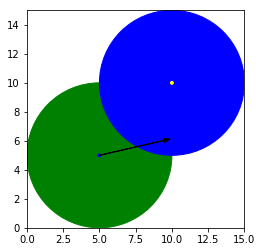

In [26]:
c1 = ((5, 5), 5)
ang = 13
c2 = ((10, 10), 5)

# overlap?
ax = plt.axes(xlim=(0, 15), ylim=(0, 15))
line, = ax.plot([], [])
ax.add_patch(Circle(c1[0], c1[1], color='green')) 
ax.add_patch(Circle(c1[0], 0.1, color='blue')) 
ax.add_patch(Circle(c2[0], c2[1], color='blue')) 
ax.add_patch(Circle(c2[0], 0.1, color='yellow')) 

ax.add_patch(FancyArrow(c1[0][0], c1[0][1], 
                        find_dx(c1[0][0], ang, c1[1]), find_dy(c1[0][1], ang, c1[1]),
                        color='black', length_includes_head=True, head_width=0.3))

ax.set_aspect('equal')

Overlap
a:5, c:7.0710678118654755
angle 91 diff. 314.0


ValueError: math domain error

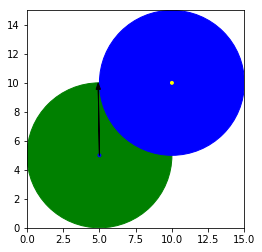

In [27]:
c1 = ((5, 5), 5)
ang = 91
c2 = ((10, 10), 5)

# overlap?
ax = plt.axes(xlim=(0, 15), ylim=(0, 15))
line, = ax.plot([], [])
ax.add_patch(Circle(c1[0], c1[1], color='green')) 
ax.add_patch(Circle(c1[0], 0.1, color='blue')) 
ax.add_patch(Circle(c2[0], c2[1], color='blue')) 
ax.add_patch(Circle(c2[0], 0.1, color='yellow')) 

ax.add_patch(FancyArrow(c1[0][0], c1[0][1], 
                        find_dx(c1[0][0], ang, c1[1]), find_dy(c1[0][1], ang, c1[1]),
                        color='black', length_includes_head=True, head_width=0.3))

ax.set_aspect('equal')

# overlap?

distance = get_distance(c1[0], c2[0])
if distance < c1[1] + c2[1]:
    print('Overlap')
else:
    print('Not overlap')
    
# BC > R?
tip = find_loc(c1[0], ang, c1[1])
BC = get_distance(tip, c2[0])
if BC < c2[1]:
    print('detectable')
    
# actual distance of detection
# assume it's the smaller one
c = distance
a = c2[1]
print('a:{}, c:{}'.format(a, c))
A = norm_ang(find_ang(5, 5, 10, 10) - ang)
print('angle', ang, 'diff.', A)

sin_c = c * (math.sin(math.radians(A))/a)
C = math.degrees(math.asin(sin_c))

possible_b = []
for possible_c in [C, 180-C]:
    B = 180 - (180-possible_c) - A
    #print(B)
    b = math.sin(math.radians(B)) * (a / math.sin(math.radians(A)))
    #print(b)
    possible_b.append(b)
    
for b in possible_b:
    if b < c1[1]:
        print()
        print(b)

Overlap
detectable
a:5, c:5.0
angle 91 diff. 314.0

-1.7024593920297657e-15


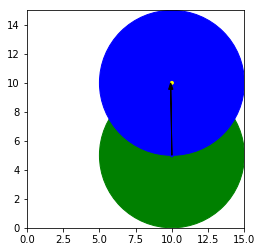

In [28]:
c1 = ((10, 5), 5)
ang = 91
c2 = ((10, 10), 5)

ax = plt.axes(xlim=(0, 15), ylim=(0, 15))
line, = ax.plot([], [])
ax.add_patch(Circle(c1[0], c1[1], color='green')) 
ax.add_patch(Circle(c1[0], 0.1, color='blue')) 
ax.add_patch(Circle(c2[0], c2[1], color='blue')) 
ax.add_patch(Circle(c2[0], 0.1, color='yellow')) 

ax.add_patch(FancyArrow(c1[0][0], c1[0][1], 
                        find_dx(c1[0][0], ang, c1[1]), find_dy(c1[0][1], ang, c1[1]),
                        color='black', length_includes_head=True, head_width=0.3))

ax.set_aspect('equal')

# overlap?

distance = get_distance(c1[0], c2[0])
if distance < c1[1] + c2[1]:
    print('Overlap')
else:
    print('Not overlap')
    
# BC > R?
tip = find_loc(c1[0], ang, c1[1])
BC = get_distance(tip, c2[0])
if BC < c2[1]:
    print('detectable')
    
# actual distance of detection
# assume it's the smaller one
c = distance
a = c2[1]
print('a:{}, c:{}'.format(a, c))
A = norm_ang(find_ang(5, 5, 10, 10) - ang)
print('angle', ang, 'diff.', A)

sin_c = c * (math.sin(math.radians(A))/a)
C = math.degrees(math.asin(sin_c))

possible_b = []
for possible_c in [C, 180-C]:
    B = 180 - (180-possible_c) - A
    #print(B)
    b = math.sin(math.radians(B)) * (a / math.sin(math.radians(A)))
    #print(b)
    possible_b.append(b)
    
for b in possible_b:
    if b < c1[1]:
        print()
        print(b)

In [29]:
cases = [
    [((10, 10), 4), ((5, 5), 4)],
    [((10, 10), 4), ((5, 10), 4)],
    [((10, 10), 4), ((5, 15), 4)],
    [((10, 10), 4), ((10, 5), 4)],
    [((10, 10), 4), ((10, 15), 4)],
    [((10, 10), 4), ((15, 5), 4)],
    [((10, 10), 4), ((15, 10), 4)],
    [((10, 10), 4), ((15, 15), 4)],
]

Overlap
detectable, 2
a:4, c:5.0
angle 232 diff. 52
final 2.3883970165059374


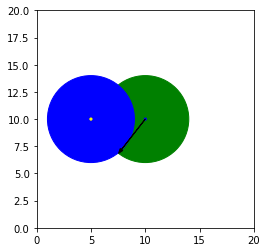

In [30]:
c = 1

c1 = cases[c][0]
c2 = cases[c][1]
ang = 232

ax = plt.axes(xlim=(0, 20), ylim=(0, 20))
line, = ax.plot([], [])

ax.add_patch(Circle(c1[0], c1[1], color='green')) 
ax.add_patch(Circle(c1[0], 0.1, color='blue')) 
ax.add_patch(Circle(c2[0], c2[1], color='blue')) 
ax.add_patch(Circle(c2[0], 0.1, color='yellow')) 

ax.add_patch(FancyArrow(c1[0][0], c1[0][1], 
                        find_dx(c1[0][0], ang, c1[1]), find_dy(c1[0][1], ang, c1[1]),
                        color='black', length_includes_head=True, head_width=0.3))

ax.set_aspect('equal')

# overlap - quadrant universal
distance = get_distance(c1[0], c2[0])
if distance < c1[1] + c2[1]:
    print('Overlap')
else:
    print('Not overlap')


# Detectable?
tip = find_loc(c1[0], ang, c1[1])
BC = get_distance(tip, c2[0])
if BC < c2[1]:
    print('detectable, 1')
else:
    other_ang = find_ang(c1[0][0], c1[0][1], c2[0][0], c2[0][1])
    diff = abs(ang-other_ang)
    closest = distance * math.sin(math.radians(diff)) / math.sin(math.radians(90))
    if closest < c2[1]:
        print('detectable, 2')
        
# actual distance of detection
# among all possible answers, it's smaller than range and the smaller one
c = distance
a = c2[1]
print('a:{}, c:{}'.format(a, c))
A = abs(find_ang(c1[0][0], c1[0][1], c2[0][0], c2[0][1]) - ang)
print('angle', ang, 'diff.', A)

sin_c = c * (math.sin(math.radians(A))/a)
C = math.degrees(math.asin(sin_c))

possible_b = []
for possible_c in [C, 180-C]:
    B = 180 - (180-possible_c) - A
    #print(B)
    b = math.sin(math.radians(B)) * (a / math.sin(math.radians(A)))
    #print(b)
    possible_b.append(b)
    
final_b = []
for b in possible_b:
    if b < c1[1]:
        final_b.append(b)
print('final', min(final_b))


In [31]:
# actual distance of detection
c = distance
a = c2[1]
A = find_ang(5, 5, 10, 10) - ang
b = c * math.cos(A) - math.sqrt(a**2 - c**2 * math.sin(A)**2)
print(b)

ValueError: math domain error

In [32]:
 b=ccosA+/-sqrt(a^2-c^2sin^2A). 

SyntaxError: invalid syntax (<ipython-input-32-004513fc177d>, line 1)

In [33]:
find_ang(5, 5, 10, 10) - ang

-187.0

In [127]:
c1[0]

(5, 5)

In [128]:
c2[0]

(10, 10)

In [ ]:
cases = [
    [((10, 10), 4), ((5, 5), 4)],
    [((10, 10), 4), ((5, 10), 4)],
    [((10, 10), 4), ((5, 15), 4)],
    [((10, 10), 4), ((10, 5), 4)],
    [((10, 10), 4), ((10, 15), 4)],
    [((10, 10), 4), ((15, 5), 4)],
    [((10, 10), 4), ((15, 10), 4)],
    [((10, 10), 4), ((15, 15), 4)],
]



In [ ]:
# ir sensor: loc, ang, range


def get_ir_reading(IR, environment, agents):
    pass


def check_wall(environment, ir_loc, ir_ang):
    """
    Check reading due to wall.

    Logic:
    1. Find the maximum point within range of signal detection (range_max)
    2. See whether this point goes beyond the width and height of the environment.
    3. If it does, that means a wall is within range of detection.
    4. Calculate distance between IR sensor and the closest point to wall.
    5. IR sensor reading is the the ratio between this distance and the max range of detection.
    """
    range_max = find_loc(loc, ang, ir_range)

    else:
        distance = 1

    reading = 1-distance

return reading



In [ ]:
Test_wall = [
    [(260, 260), 1]
]